# Telecom Churn - ML Group Case Study

### Business Problem Overview

    In the telecom industry, customers are able to choose from multiple service providers and actively switch 
    from one operator to another. 
    In this highly competitive market, the telecommunications industry experiences 
    an average of 15-25% annual churn rate. 

    Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, 
    customer retention has now become even more important than customer acquisition.

### 1. Importing Libraries:-

In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

from sklearn.cross_validation import train_test_split
from imblearn.over_sampling import SMOTE
#Improting the PCA module
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

from sklearn.ensemble import BaggingClassifier

import sklearn.ensemble as en
import pandas as pd

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale

%matplotlib inline

### 2. Data Preparation and Understanding:-

#### Data Understanding:-

    In this project we will analyse customer-level data of a leading telecom firm, build predictive models 
    to identify customers at high risk of churn and identify the main indicators of churn.

    Features of the dataset at a glance:-

    A. There are 226 columns and 0 to 99999 entries in each columns.
    B. There of 179 columns of float64 type , 35 columns of int64 type and 12 columns of object type. 


In [320]:
### Importing data
telecom_data= pd.read_csv("telecom_churn_data.csv")

In [321]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [322]:
telecom_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


### Data Dictionary:-

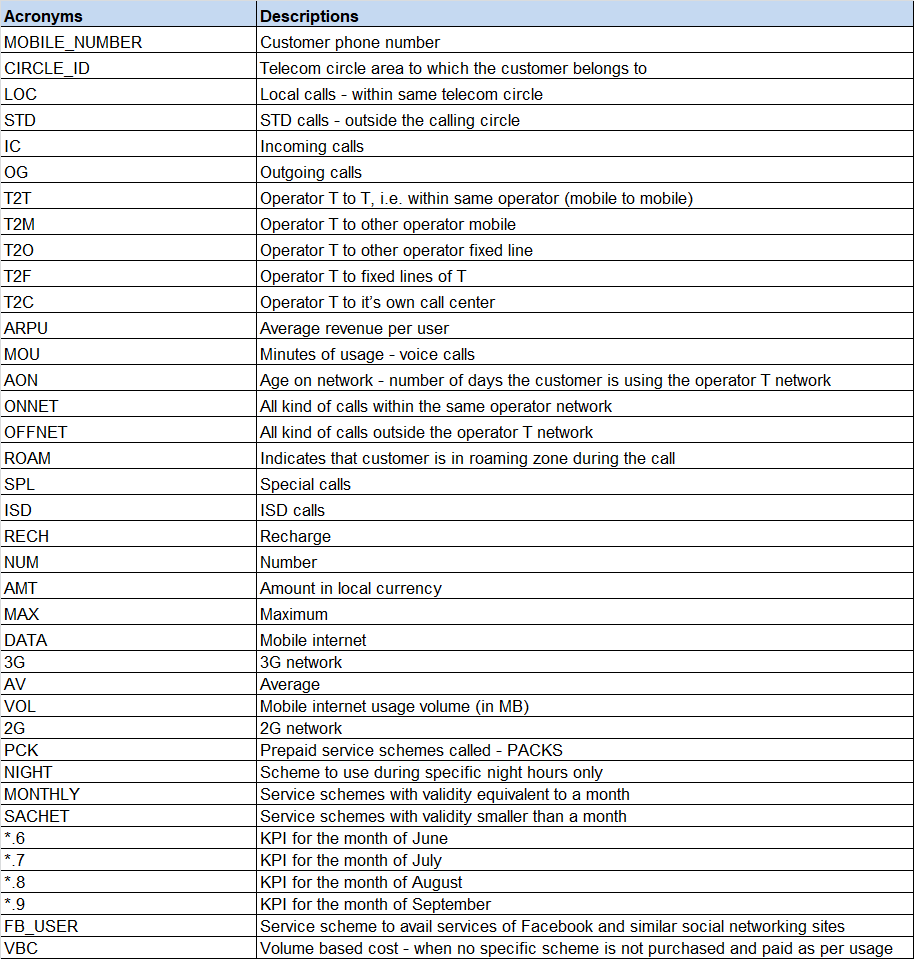

In [323]:
# summarising number of missing values in each column
telecom_data.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [324]:
# percentage of missing values in each column
round(telecom_data.isnull().sum()/len(telecom_data.index), 2)*100

mobile_number            0.0
circle_id                0.0
loc_og_t2o_mou           1.0
std_og_t2o_mou           1.0
loc_ic_t2o_mou           1.0
last_date_of_month_6     0.0
last_date_of_month_7     1.0
last_date_of_month_8     1.0
last_date_of_month_9     2.0
arpu_6                   0.0
arpu_7                   0.0
arpu_8                   0.0
arpu_9                   0.0
onnet_mou_6              4.0
onnet_mou_7              4.0
onnet_mou_8              5.0
onnet_mou_9              8.0
offnet_mou_6             4.0
offnet_mou_7             4.0
offnet_mou_8             5.0
offnet_mou_9             8.0
roam_ic_mou_6            4.0
roam_ic_mou_7            4.0
roam_ic_mou_8            5.0
roam_ic_mou_9            8.0
roam_og_mou_6            4.0
roam_og_mou_7            4.0
roam_og_mou_8            5.0
roam_og_mou_9            8.0
loc_og_t2t_mou_6         4.0
                        ... 
arpu_2g_9               74.0
night_pck_user_6        75.0
night_pck_user_7        74.0
night_pck_user

Let's check whether some rows have a large number of missing values.

In [325]:
# missing values in rows
telecom_data.isnull().sum(axis=1)

0         97
1         20
2         30
3         40
4         30
5         40
6         40
7         69
8         20
9         30
10        49
11        31
12        40
13        30
14        40
15        69
16        40
17        40
18        40
19        10
20        40
21        40
22        40
23        10
24        40
25        40
26        40
27        40
28        30
29        69
        ... 
99969     20
99970     10
99971     40
99972     30
99973     41
99974     40
99975     40
99976     40
99977     40
99978    162
99979     40
99980     10
99981     11
99982     10
99983     99
99984      0
99985     41
99986      0
99987     30
99988     10
99989     40
99990     30
99991     40
99992     40
99993    164
99994     40
99995     40
99996    118
99997      0
99998    120
Length: 99999, dtype: int64

### Filter high-value customers -

    Defination of high-value customers as follows:-
    Those who have recharged with an amount more than or equal to X, where X is the 70th percentile 
    of the average recharge amount in the first two months (the good phase).

#### Note: - High value customer has been filtered from follwing columns -
    
    'total_rech_amt_6' - Total recharge amount (voice) for the month of 6
    'total_rech_amt_7' - Total recharge amount (voice) for the month of 7
    
    'total_rech_data_6' - Count of recharge amount (data) for the month of 6
    'total_rech_data_7' - Count of recharge amount (data) for the month of 7
    
    'av_rech_amt_data_6' - Avg. of recharge amount (data) for the month of 6
    'av_rech_amt_data_7' - Avg. of recharge amount (data) for the month of 7

    Total recharge amount per month ==> total_rech_amt_mnth + (total_rech_data_mnth * av_rech_amt_data_mnth )

In [326]:
#replacing null to avoid compulational issue --
telecom_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']] =  telecom_data[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_data_6','total_rech_data_7','total_rech_data_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']].replace(np.nan, 0, regex=True)

In [327]:
## Creating total amount KPI for Data:-

telecom_data['total_rech_amt_data_6'] = telecom_data.apply(lambda x: (x['total_rech_data_6']*x['av_rech_amt_data_6']),axis =1)
telecom_data['total_rech_amt_data_7'] = telecom_data.apply(lambda x: (x['total_rech_data_7']*x['av_rech_amt_data_7']),axis =1)

In [328]:
## Creating average amount KPI for data + talktime:-

telecom_data['avg_rech_amt_6_7'] = telecom_data.apply(lambda x: ((x['total_rech_amt_6']+x['total_rech_amt_7']+x['total_rech_amt_data_6']+x['total_rech_amt_data_7'])/2),axis =1)

#### Decile Analysis:-
    We have to choose customers belonging to 70 percentile and above

In [329]:
telecom_data['avg_rech_amt_6_7'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]).T

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
10%         60.000000
20%        108.500000
30%        155.000000
40%        209.500000
50%        275.000000
60%        360.000000
70%        478.000000
80%        656.500000
90%       1028.000000
max      61236.000000
Name: avg_rech_amt_6_7, dtype: float64

In [330]:
#Lets create a KPI for decile
telecom_data['avg_rech_decile'] = pd.qcut(telecom_data['avg_rech_amt_6_7'], 10, labels=False)

In [331]:
##Choosing customers belonging to 70 percentile and above
telecom_data_high_value = telecom_data[telecom_data.avg_rech_decile >= 7 ]

In [332]:
telecom_data_high_value.count()[0]

29953

   We have filtered out **29.9K** high value customers - we will be working on dataset - **telecom_data_high_value** having high valued customers only

### Creating Some KPIs


### Frequency of customer buying voice and data pack in first 3 months

**Frequency of buying voice pack**

In [333]:
def churnfreqrec(telecom_data_high_value):
    i = 0
    a = np.where(telecom_data_high_value[['date_of_last_rech_6']].isnull(),0,1)
    i = i+a
    b = np.where(telecom_data_high_value[['date_of_last_rech_7']].isnull(),0,1)
    i=i+b
    c = np.where(telecom_data_high_value[['date_of_last_rech_8']].isnull(),0,1)
    i=i+c
    return i

In [334]:
telecom_data_high_value['Frequency_recharge_voice'] = 0
telecom_data_high_value['Frequency_recharge_voice'] = telecom_data_high_value.apply(churnfreqrec, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Frequency of buying data pack**

In [335]:
telecom_data_high_value['Frequency_recharge_data'] = 0
telecom_data_high_value['Frequency_recharge_data'] = telecom_data_high_value.apply(lambda x: (x['total_rech_data_6']+x['total_rech_data_7']+x['total_rech_data_8']),axis =1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [336]:
##dropping individual frequency columns since total frequency has been caluclate for data -
telecom_data_high_value.drop(['total_rech_data_6','total_rech_data_7', 'total_rech_data_8'], axis=1, inplace=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Recency of buying voice and data packs

#### Working with date variables to prepare for further calculations

In [337]:
for variable in telecom_data_high_value.columns:
    if telecom_data_high_value[variable].dtype.name in ['object']:
        print (variable)

last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
last_date_of_month_9
date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_9
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
date_of_last_rech_data_9


In [338]:
## Reference data columns (refernce dates for last date of the month)
## instead of replacing the nan columns we are hardcoding the columns with the date of the last day of the month
telecom_data_high_value['last_date_of_month_6'] = pd.to_datetime('6/30/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_7'] = pd.to_datetime('7/31/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_8'] = pd.to_datetime('8/31/2014', format='%m/%d/%Y')
telecom_data_high_value['last_date_of_month_9'] = pd.to_datetime('9/30/2014', format='%m/%d/%Y')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [339]:
## making the date pattern uniform
telecom_data_high_value[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']] = telecom_data_high_value[['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']].replace('-', '/', regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [340]:
## converting the columns to date format
telecom_data_high_value['date_of_last_rech_6'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_6'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_7'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_7'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_8'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_8'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_9'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_9'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_6'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_6'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_7'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_7'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_8'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_8'], format='%m/%d/%Y')
telecom_data_high_value['date_of_last_rech_data_9'] = pd.to_datetime(telecom_data_high_value['date_of_last_rech_data_9'], format='%m/%d/%Y')

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

#### Calculating the Recency of last recharge - voice

In [341]:
def churnrecv(telecom_data_high_value):
    k=True
    b = np.where(telecom_data_high_value[['date_of_last_rech_8']].isnull(),0,1)
    c = np.where(telecom_data_high_value[['date_of_last_rech_7']].isnull(),0,1)
    d = np.where(telecom_data_high_value[['date_of_last_rech_6']].isnull(),0,1)
    while True:
        if b == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_8'])
            break
        elif c == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_7'])
            break
        elif d == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_6'])
            break
    return no_of_Days

In [342]:
telecom_data_high_value['Recency_last_recharge_voice'] = telecom_data_high_value.apply(churnrecv, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Calculating the Recency of last recharge - data

In [343]:
def churnrecd(telecom_data_high_value):
    k=True
    b = np.where(telecom_data_high_value[['date_of_last_rech_8']].isnull(),0,1)
    c = np.where(telecom_data_high_value[['date_of_last_rech_7']].isnull(),0,1)
    d = np.where(telecom_data_high_value[['date_of_last_rech_6']].isnull(),0,1)
    while True:
        if b == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_data_8'])
            break
        elif c == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_data_7'])
            break
        elif d == 1:
            no_of_Days = (telecom_data_high_value['last_date_of_month_8']  - telecom_data_high_value['date_of_last_rech_data_6'])
            break
    return no_of_Days

In [344]:
telecom_data_high_value['Recency_last_recharge_data'] = telecom_data_high_value.apply(churnrecd, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Lets observe some trends in monetary value**
- ARPU (Average Revenue per user) can be treated as Monetary value here.

In [345]:
# extracting month and year from issue_date
telecom_data_high_value['date_of_last_rech_6_month'] = telecom_data_high_value['date_of_last_rech_6'].apply(lambda x: x.month)
telecom_data_high_value['date_of_last_rech_7_month'] = telecom_data_high_value['date_of_last_rech_7'].apply(lambda x: x.month)
telecom_data_high_value['date_of_last_rech_8_month'] = telecom_data_high_value['date_of_last_rech_8'].apply(lambda x: x.month)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

**Trend of monetary value for first 3 years**

    We see a sharp decline in the monetary value in the 7th month.
    Also the mean value shifts to lower value as shown in the box plot.

In [346]:
# let's first observe the number of mean revenue across month
print(telecom_data_high_value.groupby('date_of_last_rech_6_month').arpu_6.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_7_month').arpu_7.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_8_month').arpu_8.mean().round(2))

date_of_last_rech_6_month
6.0    559.8
Name: arpu_6, dtype: float64
date_of_last_rech_7_month
7.0    562.04
Name: arpu_7, dtype: float64
date_of_last_rech_8_month
8.0    516.59
Name: arpu_8, dtype: float64


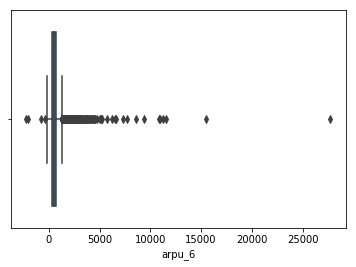

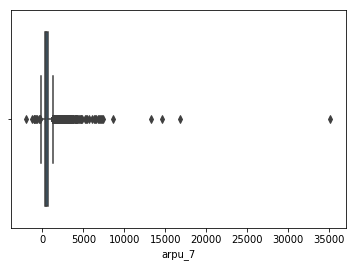

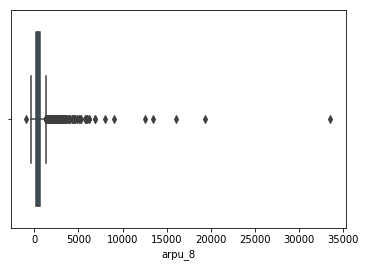

In [347]:
sns.boxplot(telecom_data_high_value['arpu_6'])
plt.show()
sns.boxplot(telecom_data_high_value['arpu_7'])
plt.show()
sns.boxplot(telecom_data_high_value['arpu_8'])
plt.show()

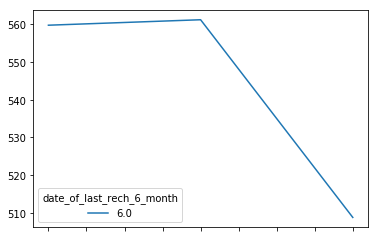

In [348]:
pv = pd.pivot_table(telecom_data_high_value, columns='date_of_last_rech_6_month',
                    values=['arpu_6', 'arpu_7', 'arpu_8']  , aggfunc='mean')
pv
pv.plot(legend=True)

**Lets see the trend accross incomming and outgoing calls**

    We see a sharp decline in Outgoing and incomming calls from first two to third month

In [349]:
# let's first observe the number of mean outgoing calls across month
print(telecom_data_high_value.groupby('date_of_last_rech_6_month').loc_og_mou_6.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_7_month').loc_og_mou_7.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_8_month').loc_og_mou_8.mean().round(2))

date_of_last_rech_6_month
6.0    259.01
Name: loc_og_mou_6, dtype: float64
date_of_last_rech_7_month
7.0    259.85
Name: loc_og_mou_7, dtype: float64
date_of_last_rech_8_month
8.0    246.17
Name: loc_og_mou_8, dtype: float64


In [350]:
# let's first observe the number of mean incoming calls across month
print(telecom_data_high_value.groupby('date_of_last_rech_6_month').total_ic_mou_6.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_7_month').total_ic_mou_7.mean().round(2))
print(telecom_data_high_value.groupby('date_of_last_rech_8_month').total_ic_mou_8.mean().round(2))

date_of_last_rech_6_month
6.0    290.78
Name: total_ic_mou_6, dtype: float64
date_of_last_rech_7_month
7.0    297.72
Name: total_ic_mou_7, dtype: float64
date_of_last_rech_8_month
8.0    284.2
Name: total_ic_mou_8, dtype: float64


**Dropping unnecessary columns**

In [351]:
##Dropping av_rech_amt_data_mnth column since we already have created KPI for total.
##Dropping decile column since it is no longer necessary

telecom_data_high_value.drop(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'avg_rech_decile'], axis=1, inplace= True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


**Dropping columns with single vlaue diversity**
    
    circle_id        - single value '109'
    
**Replacing NULL value with '1':-**
    
    Categorical levels:-
    loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou
    
    '0' - signifies have done some calls per user (loc/std/mou).
    '1' - signifies have done none. (28 customers no loc_og or std_og or loc_ic).

In [352]:
telecom_data_high_value[['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].nunique()

circle_id         1
loc_og_t2o_mou    1
std_og_t2o_mou    1
loc_ic_t2o_mou    1
dtype: int64

In [353]:
telecom_data_high_value[['circle_id','loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].isnull().any()

circle_id         False
loc_og_t2o_mou     True
std_og_t2o_mou     True
loc_ic_t2o_mou     True
dtype: bool

In [354]:
## Dropping circle id
telecom_data_high_value.drop( 'circle_id', axis=1, inplace= True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [355]:
##replacing null in 'loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou'

telecom_data_high_value[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']] = telecom_data_high_value[['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou']].replace(np.nan, 1, regex=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [356]:
## Checking the size of each category

In [357]:
for x in ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']:
    print(telecom_data_high_value.groupby(x).size())

loc_og_t2o_mou
0.0    29730
1.0      223
dtype: int64
std_og_t2o_mou
0.0    29730
1.0      223
dtype: int64
loc_ic_t2o_mou
0.0    29730
1.0      223
dtype: int64


### Creating CHURN indictor-

    We are now going to define the churn indicator :
    Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even 
    once in the churn phase. The attributes you need to use to tag churners are:
   
    Columns to consider:-
    a. total_ic_mou_9
    b. total_og_mou_9
    c. vol_2g_mb_9
    d. vol_3g_mb_9

In [358]:
## There are no NULL value - so pre processing required
telecom_data_high_value[['total_ic_mou_9','total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']].isnull().any()

total_ic_mou_9    False
total_og_mou_9    False
vol_2g_mb_9       False
vol_3g_mb_9       False
dtype: bool

In [359]:
#function to create churn
def churnind(telecom_data_high_value):
    if ((telecom_data_high_value.total_ic_mou_9 == 0) & (telecom_data_high_value.total_og_mou_9 == 0) & (telecom_data_high_value.vol_2g_mb_9 == 0) & (telecom_data_high_value.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0

In [360]:
telecom_data_high_value['CHURN_IND'] = telecom_data_high_value.apply(churnind, axis=1)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [361]:
#Split by churn indicator
telecom_data_high_value.groupby('CHURN_IND').size()

CHURN_IND
0    27520
1     2433
dtype: int64

In [362]:
## So we have now 2433 churner which makes ~8% of the total high value customers

**Dropping attributes for the 9th month**

In [363]:
## Since we are done with generating the KPIs and required parameters, we will drop all _9 columns

In [364]:
telecom_tobedel = telecom_data_high_value.filter(regex='_9')
telecom_tobedel.columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [365]:
telecom_data_new  = telecom_data_high_value.drop(telecom_tobedel.columns, axis=1)

**Deleting Date columns since we have already generated the required KPIs and EDA**

In [366]:
### Drop date variables since we have already used it to create recency and frequency -
telecom_data_new.drop(['last_date_of_month_6',
'last_date_of_month_7',
'last_date_of_month_8',
'date_of_last_rech_6',
'date_of_last_rech_7',
'date_of_last_rech_8',
'date_of_last_rech_data_6',
'date_of_last_rech_data_7',
'date_of_last_rech_data_8',
'date_of_last_rech_6_month',
'date_of_last_rech_8_month',
'date_of_last_rech_7_month'],axis=1, inplace = True)

In [367]:
telecom_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 164 entries, mobile_number to CHURN_IND
dtypes: float64(134), int32(1), int64(27), timedelta64[ns](2)
memory usage: 37.6 MB


    We now have reduced the varaibles to 164 -
        Next, we will treatment numeric and categoric data for model building

**Converting the recency column to numeric type**

In [368]:
#Extracting only the numeric part of recency column -
#Recency_last_recharge_voice
#Recency_last_recharge_data

In [369]:
telecom_data_new['Recency_last_recharge_voice'] = telecom_data_new['Recency_last_recharge_voice'].astype('str')

In [370]:
telecom_data_new['Recency_last_recharge_data'] = telecom_data_new['Recency_last_recharge_data'].astype('str')

In [371]:
telecom_data_new['Recency_last_recharge_data'] = telecom_data_new['Recency_last_recharge_data'].replace('NaT', '0 days', regex=True)

In [372]:
telecom_data_new['Recency_last_recharge_voice'] = telecom_data_new['Recency_last_recharge_voice'].apply(lambda x: pd.to_numeric(x.split(" ")[0]))

In [373]:
telecom_data_new['Recency_last_recharge_data'] = telecom_data_new['Recency_last_recharge_data'].apply(lambda x: pd.to_numeric(x.split(" ")[0]))

In [374]:
telecom_data_new[['Recency_last_recharge_voice','Recency_last_recharge_data']].head()

,Recency_last_recharge_voice,Recency_last_recharge_data
0,23,23
7,5,0
8,1,8
21,0,0
23,7,25


**Creating seperate List for categorical and numeric variables**

**Categorical List**

In [375]:
cat_list = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'night_pck_user_6', 'night_pck_user_7','night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8','CHURN_IND']
cat_list

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'CHURN_IND']

**Numerical List**

In [376]:
numlist = []
for x in telecom_data_new.columns:
    if x not in(cat_list):
        numlist.append(x)
numlist

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 '

**Checking for NULL values**
-- We see lots of NULL values specifically in 2g and 3g columns

In [377]:
#Creating a dataset out of the SUM of NULLs
no_of_null = pd.DataFrame(telecom_data_new[numlist].isnull().sum(axis=0)).reset_index()
no_of_null.rename(columns={ no_of_null.columns[0]: "Attributes",no_of_null.columns[1]: "NoOfNulls"},inplace=True)

In [378]:
#Taking columns where > 0.7 percentile rows are NA:-
#no_of_null[no_of_null['NoOfNulls'] > 0].head()
no_of_null.sort_values(by ='NoOfNulls', ascending=False).head(20)

,Attributes,NoOfNulls
126,arpu_3g_8,14018
111,max_rech_data_8,14018
114,count_rech_2g_8,14018
129,arpu_2g_8,14018
117,count_rech_3g_8,14018
124,arpu_3g_6,13213
127,arpu_2g_6,13213
112,count_rech_2g_6,13213
115,count_rech_3g_6,13213
109,max_rech_data_6,13213


In [379]:
## Replacing Numeric 'NaN' values as ZEROs to avoid computational error for numerical varaibles

In [380]:
telecom_data_new[numlist] = telecom_data_new[numlist].replace(np.nan, 0, regex=True)

In [381]:
telecom_data_new[numlist].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 154 entries, mobile_number to Recency_last_recharge_data
dtypes: float64(125), int32(1), int64(28)
memory usage: 35.3 MB


### Merging the 2G and 3G columns 

In [382]:
telecom_data_new['arpu_2g_3g_8'] = telecom_data_new.apply(lambda x: (x['arpu_3g_8']+x['arpu_2g_8']),axis =1)

In [383]:
telecom_data_new['arpu_2g_3g_7'] = telecom_data_new.apply(lambda x: (x['arpu_3g_7']+x['arpu_2g_7']),axis =1)

In [384]:
telecom_data_new['arpu_2g_3g_6'] = telecom_data_new.apply(lambda x: (x['arpu_3g_6']+x['arpu_2g_6']),axis =1)

In [385]:
telecom_data_new['count_rech_2g_3g_8'] = telecom_data_new.apply(lambda x: (x['count_rech_2g_8']+x['count_rech_3g_8']),axis =1)

In [386]:
telecom_data_new['count_rech_2g_3g_7'] = telecom_data_new.apply(lambda x: (x['count_rech_2g_7']+x['count_rech_3g_7']),axis =1)

In [387]:
telecom_data_new['count_rech_2g_3g_6'] = telecom_data_new.apply(lambda x: (x['count_rech_2g_6']+x['count_rech_3g_6']),axis =1)

In [388]:
###dropping the individual 2g and 3g columns

In [389]:
telecom_data_new.drop(['arpu_3g_8','arpu_2g_8','arpu_3g_7','arpu_2g_7', 'arpu_3g_6','arpu_2g_6','count_rech_2g_8','count_rech_3g_8', 'count_rech_2g_7', 'count_rech_3g_7', 'count_rech_2g_6', 'count_rech_3g_6'], axis =1, inplace= True)

**Univariate Analysis of numeric attributes**

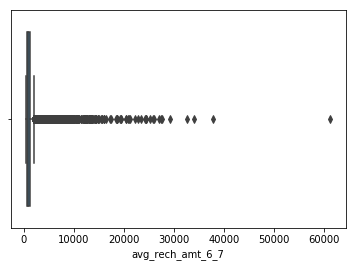

In [390]:
sns.boxplot(telecom_data_new['avg_rech_amt_6_7'])
plt.show()

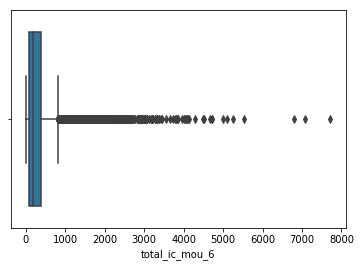

In [391]:
sns.boxplot(telecom_data_new['total_ic_mou_6'])
plt.show()

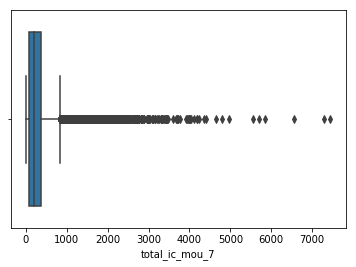

In [392]:
sns.boxplot(telecom_data_new['total_ic_mou_7'])
plt.show()

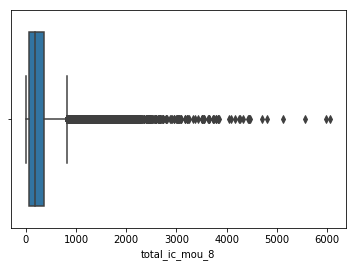

In [393]:
sns.boxplot(telecom_data_new['total_ic_mou_8'])
plt.show()

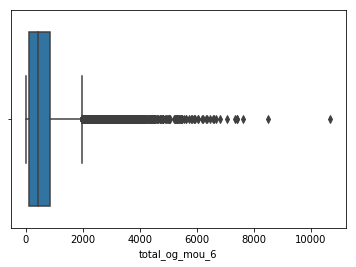

In [394]:
sns.boxplot(telecom_data_new['total_og_mou_6'])
plt.show()

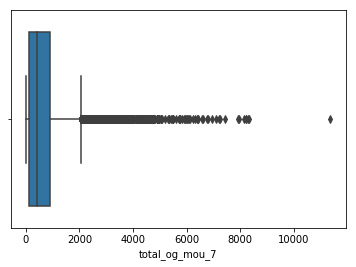

In [395]:
sns.boxplot(telecom_data_new['total_og_mou_7'])
plt.show()

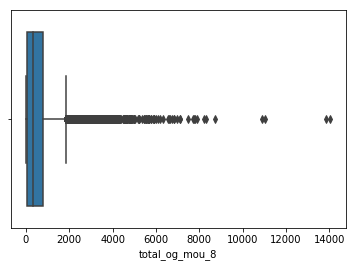

In [396]:
sns.boxplot(telecom_data_high_value['total_og_mou_8'])
plt.show()

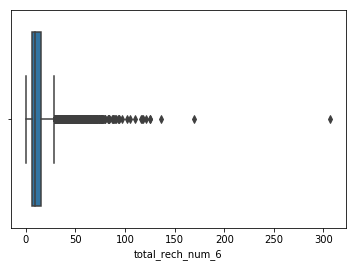

In [397]:
sns.boxplot(telecom_data_new['total_rech_num_6'])
plt.show()

**We can see outliers influence in numeric attributes** - needs outlier treatment

In [398]:
#Recalculating the numlist
numlistnew = []
for x in telecom_data_new.columns:
    if x not in(cat_list):
        numlistnew.append(x)
numlistnew

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 '

In [399]:
#taking all numeric attributes except mobile_number
numlist_f = numlistnew[1:]
len(numlist_f)

147

In [400]:
#Handling Outliers - Numeric variables
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.90))
    x = x.clip_lower(x.quantile(0.01))
    return x

In [401]:
telecom_data_new[numlist_f]=telecom_data_new[numlist_f].apply(lambda x: outlier_capping(x))

In [402]:
##Bivariate Analysis - numerical varaibles

C:\Users\lenovo\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


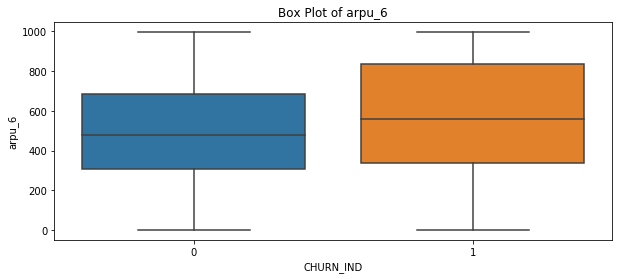

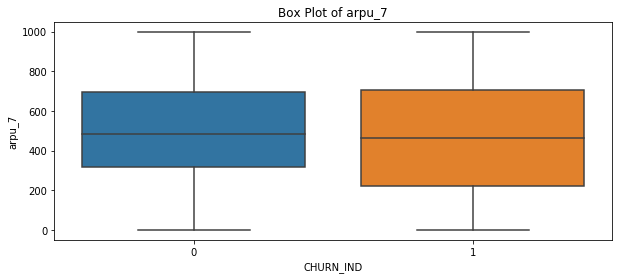

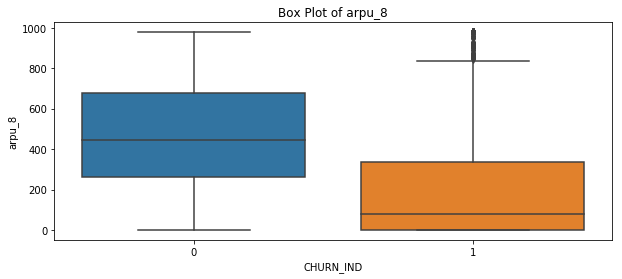

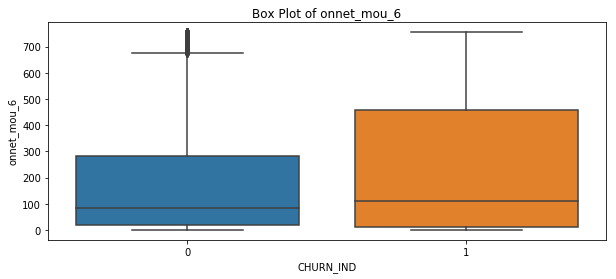

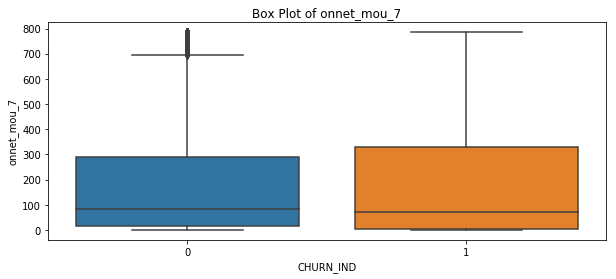

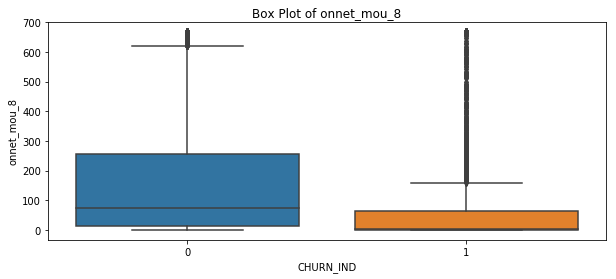

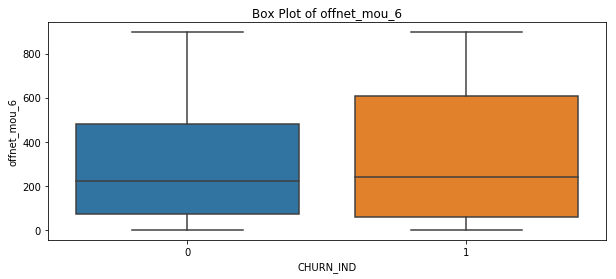

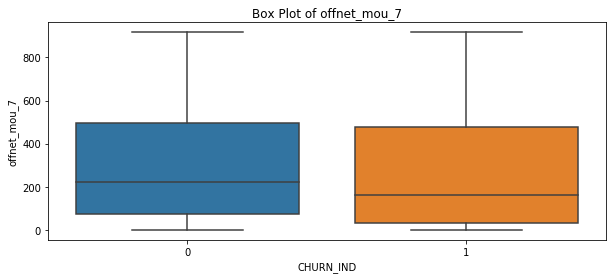

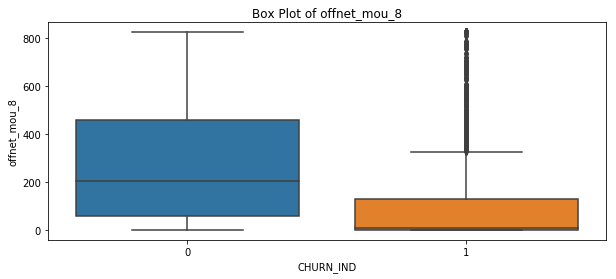

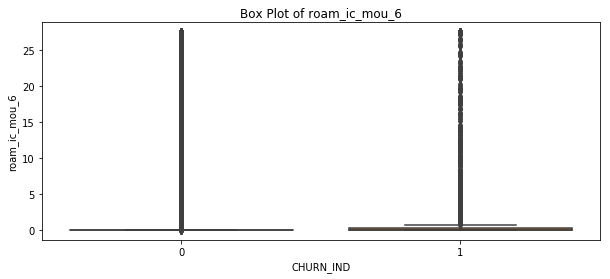

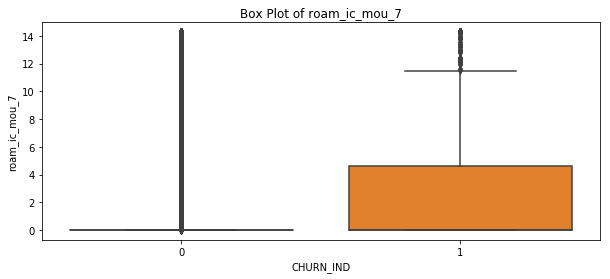

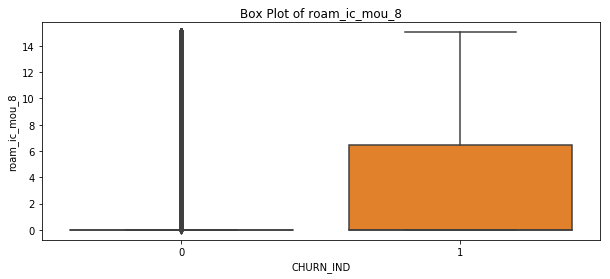

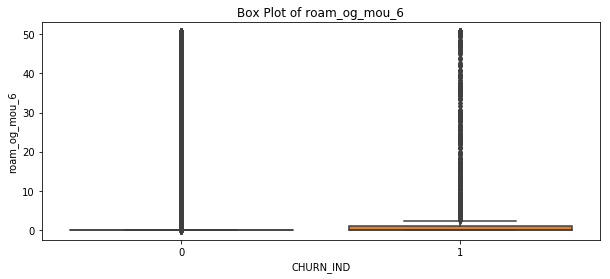

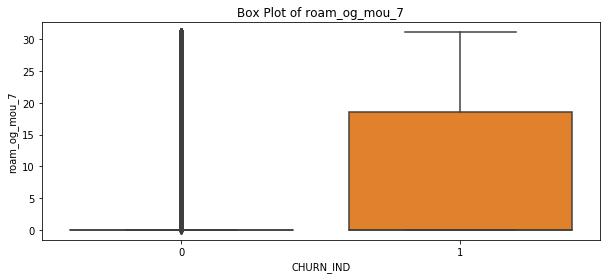

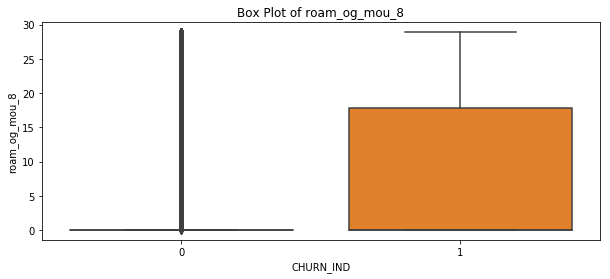

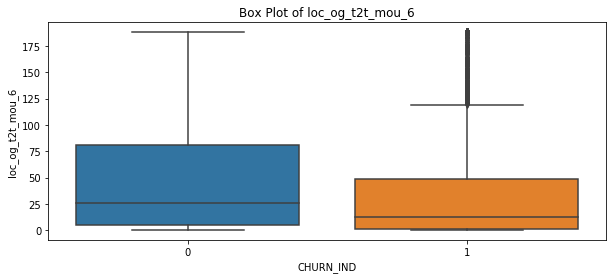

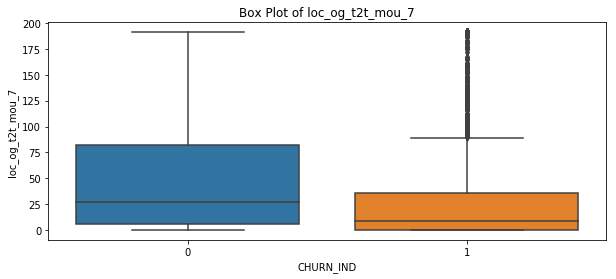

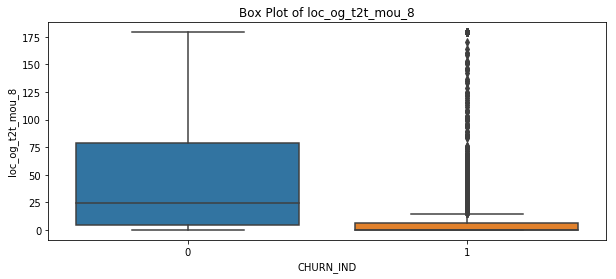

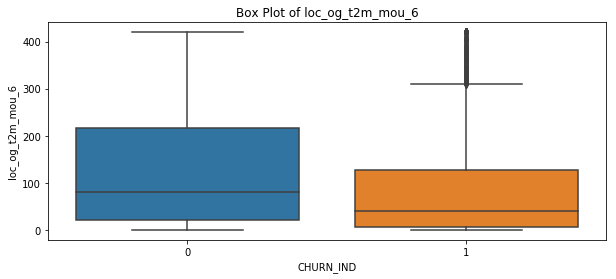

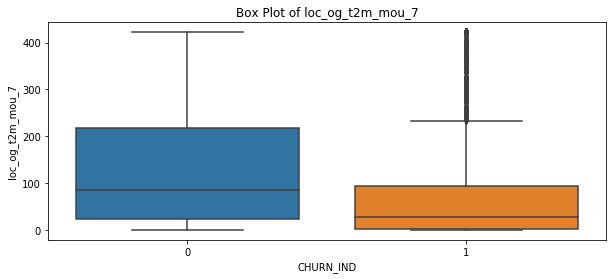

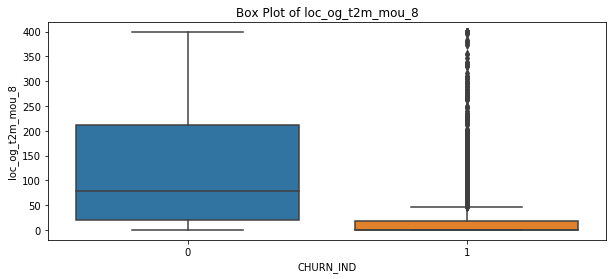

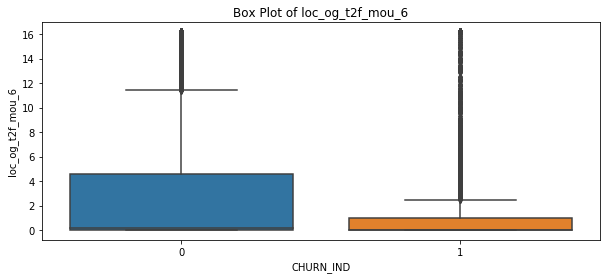

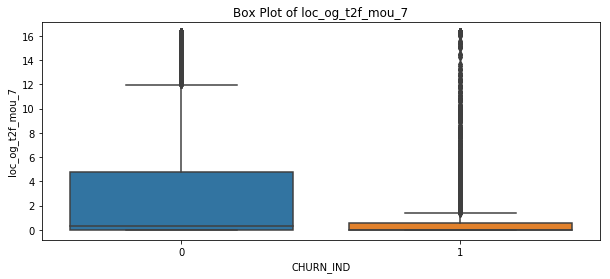

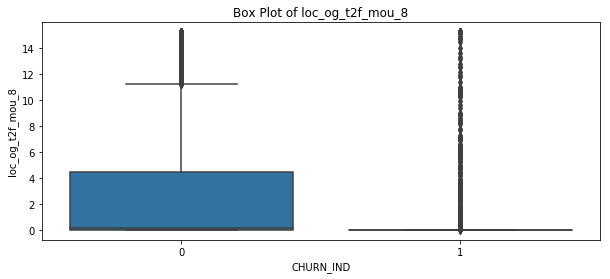

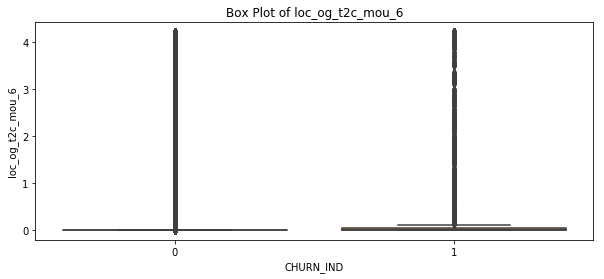

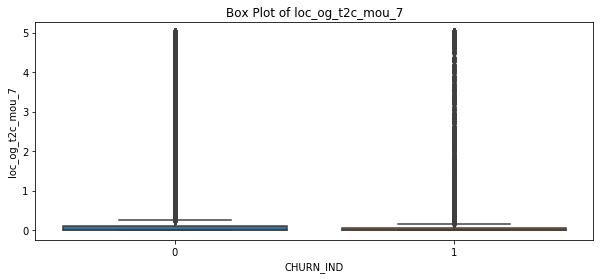

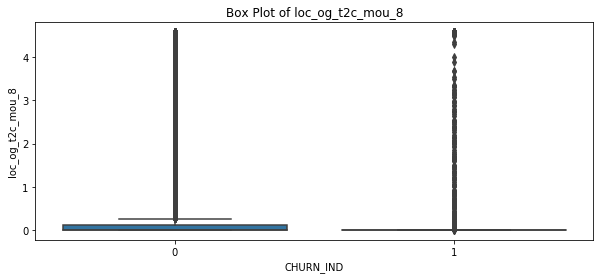

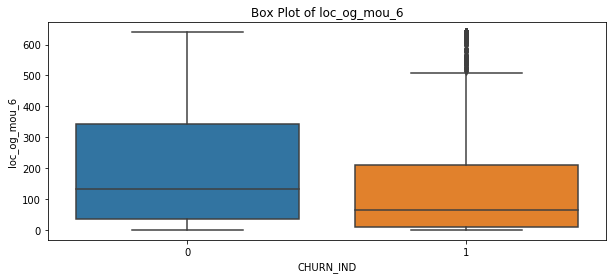

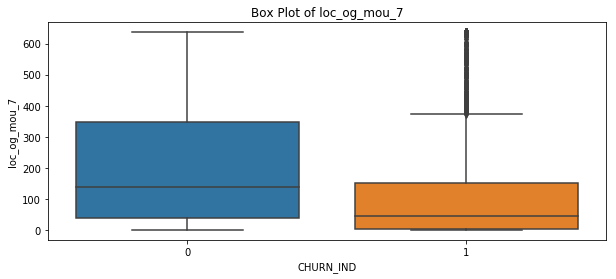

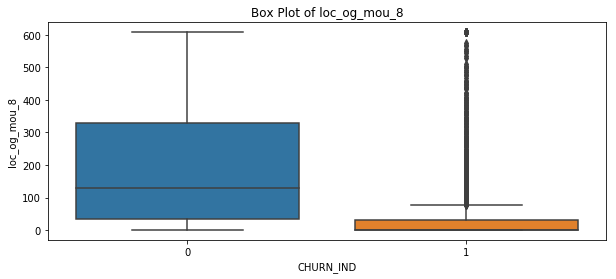

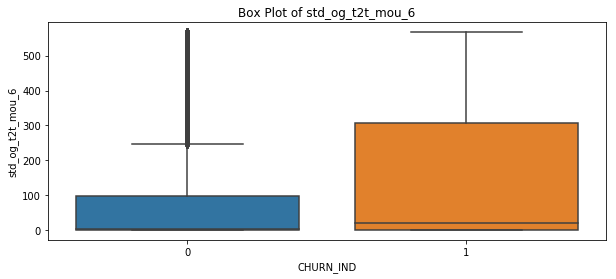

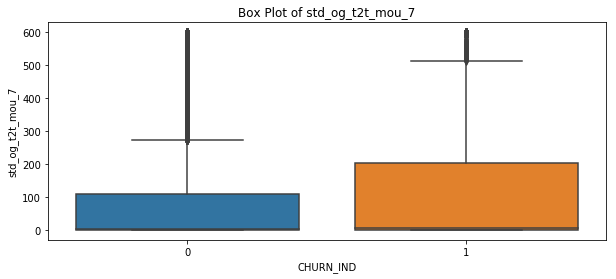

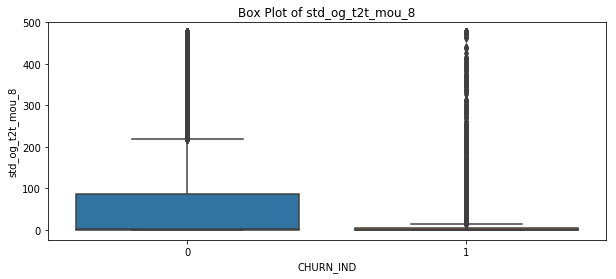

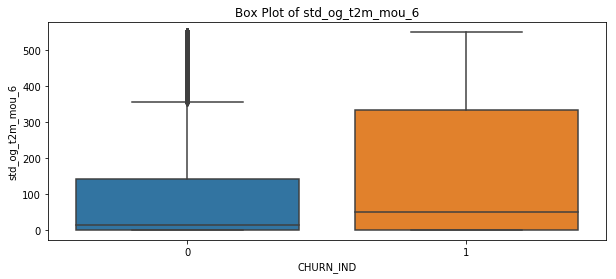

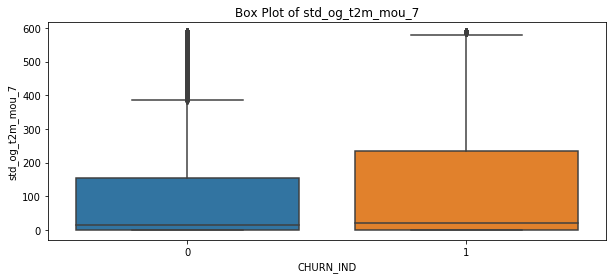

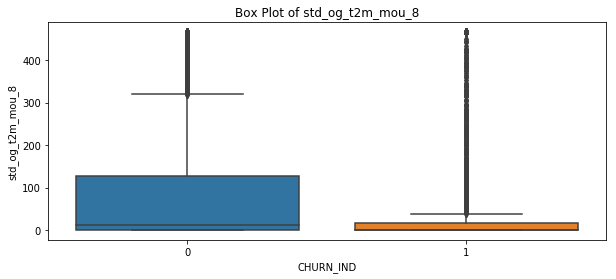

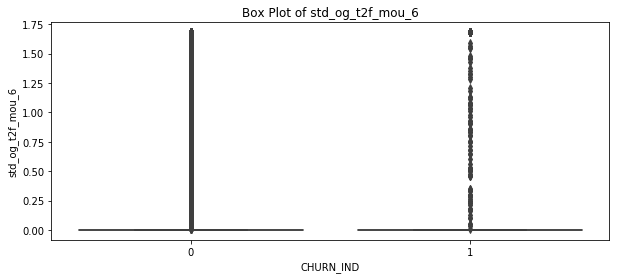

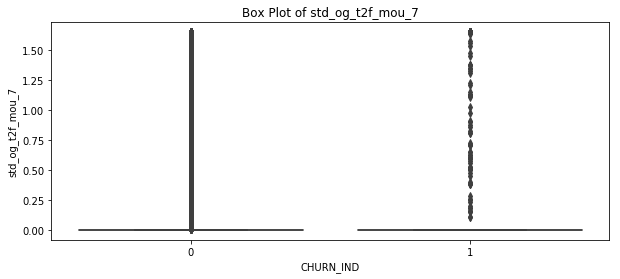

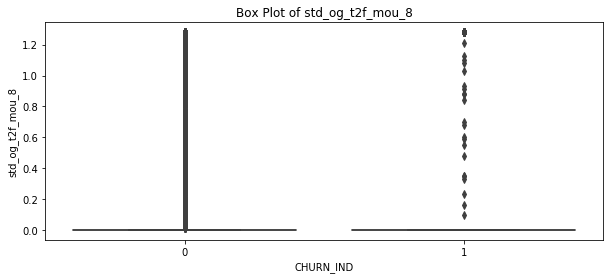

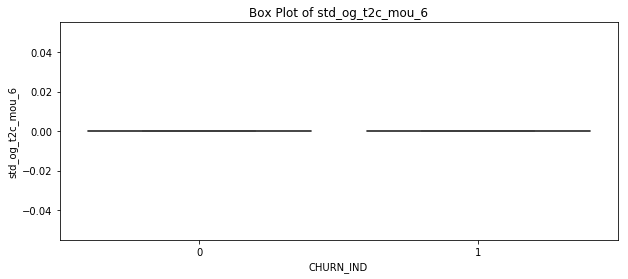

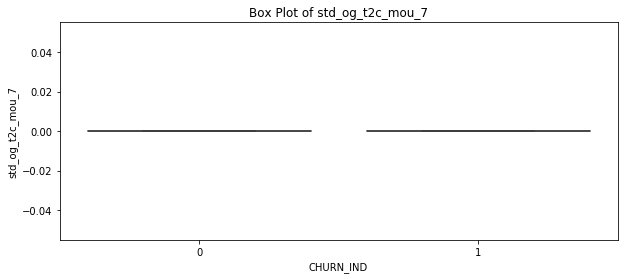

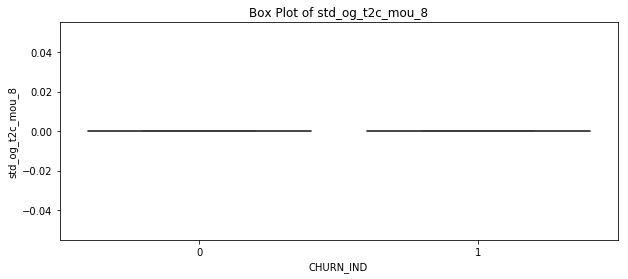

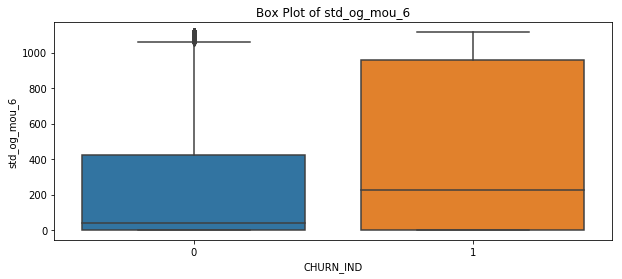

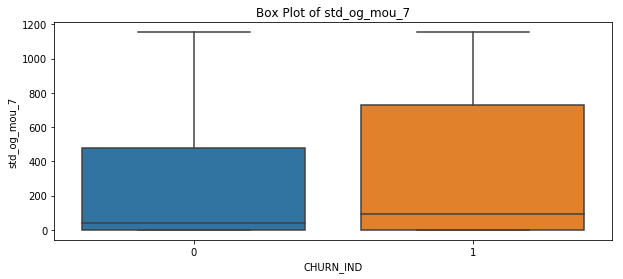

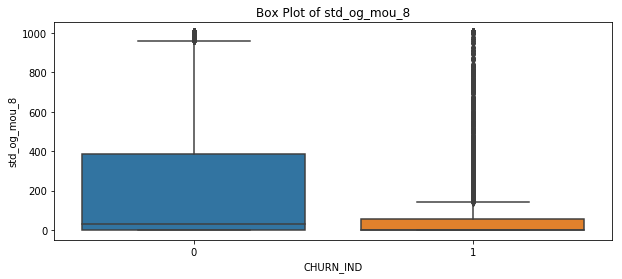

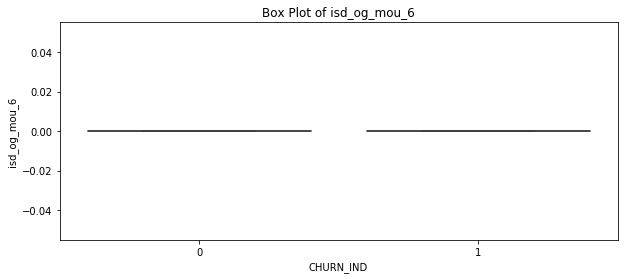

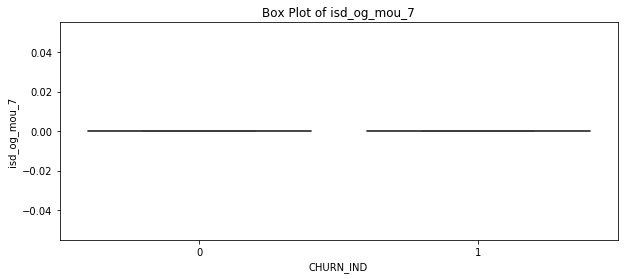

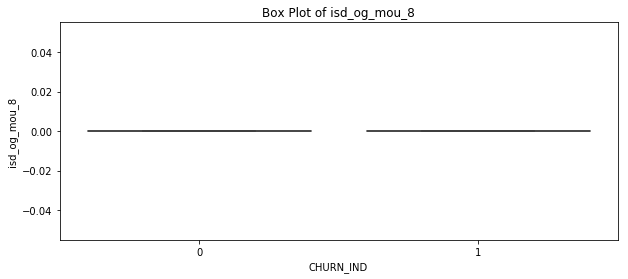

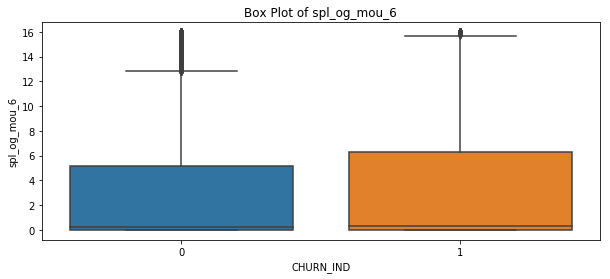

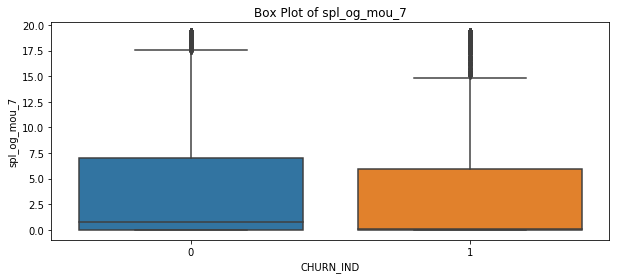

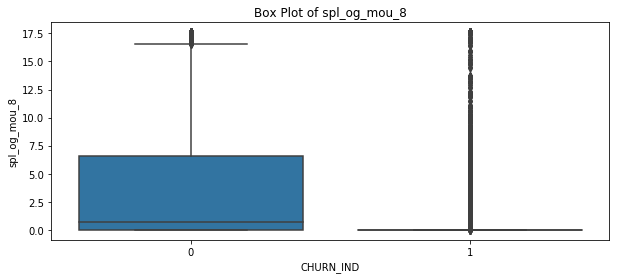

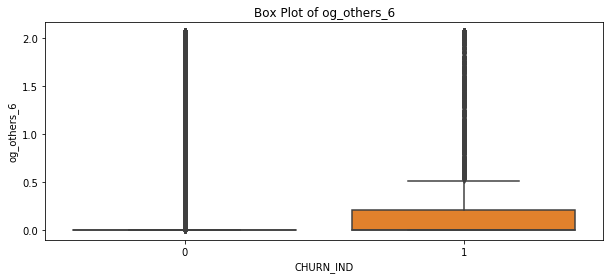

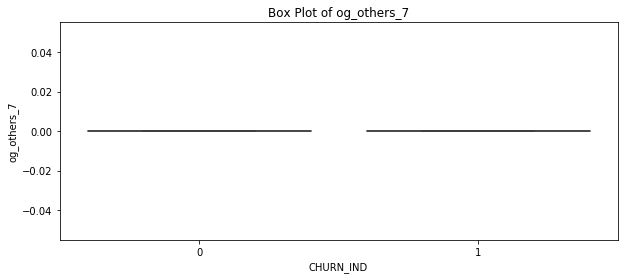

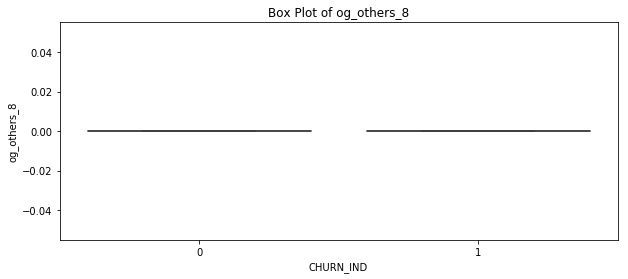

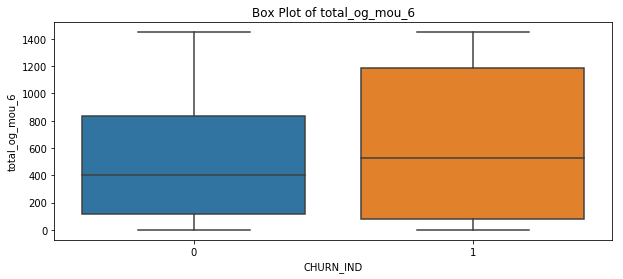

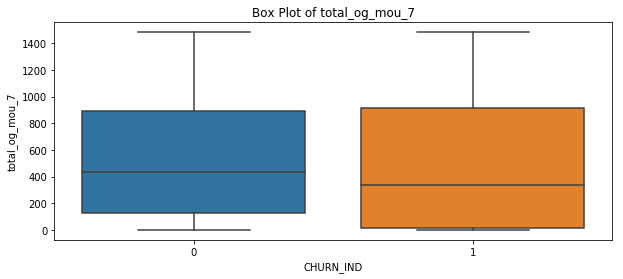

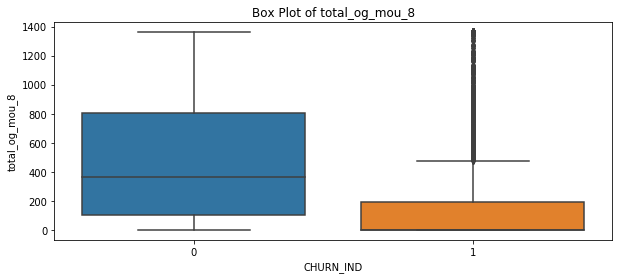

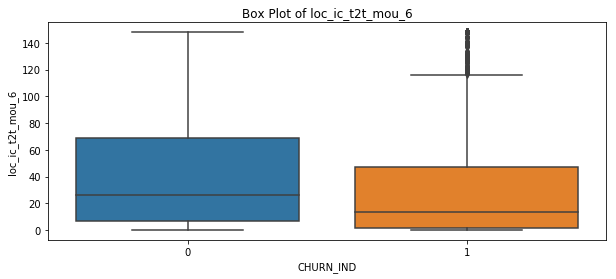

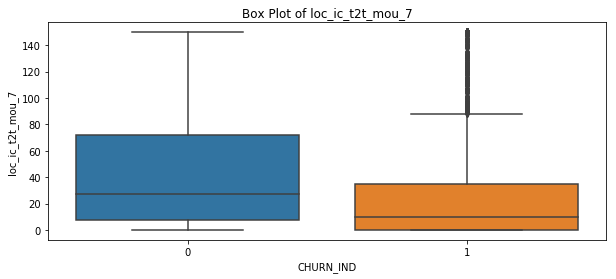

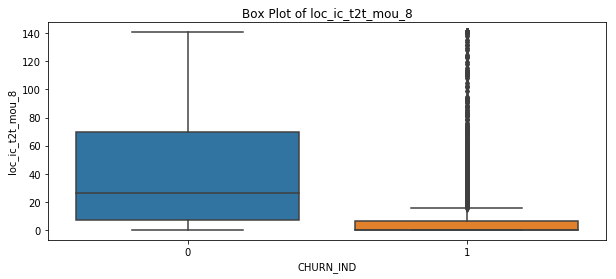

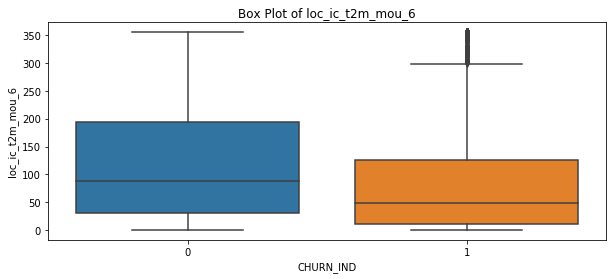

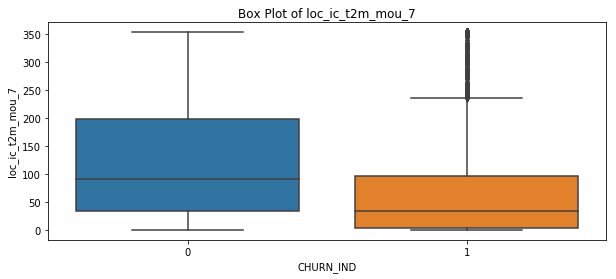

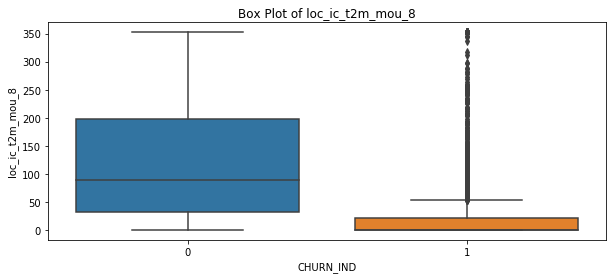

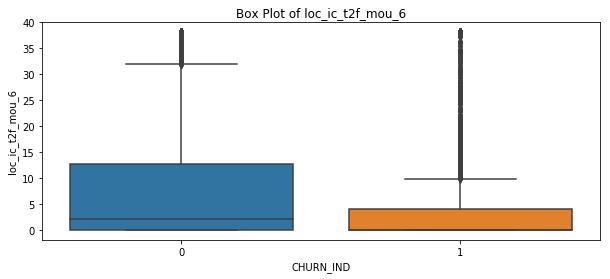

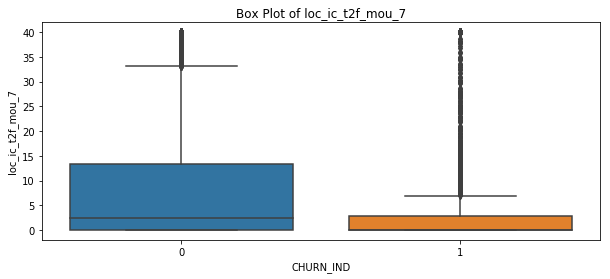

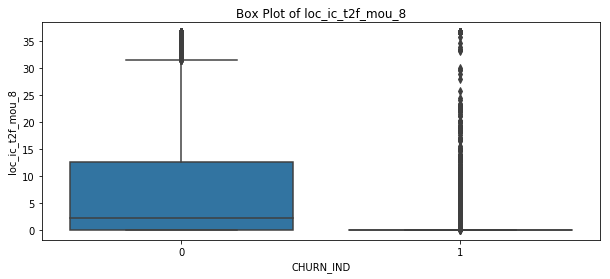

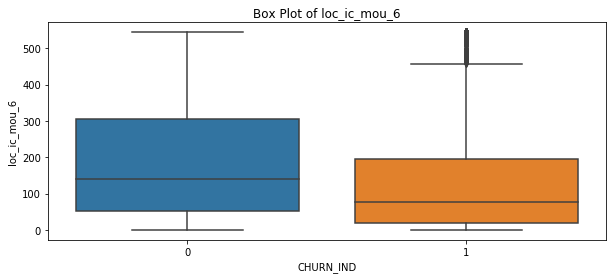

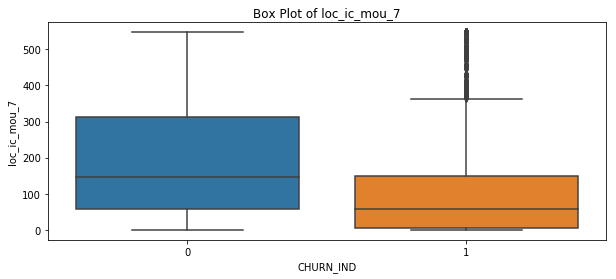

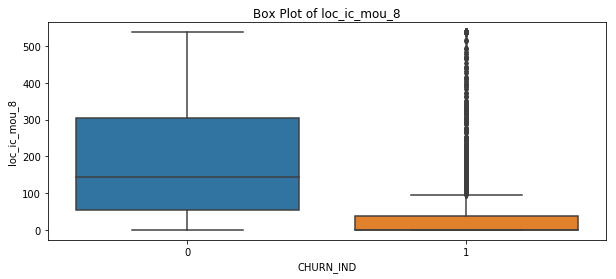

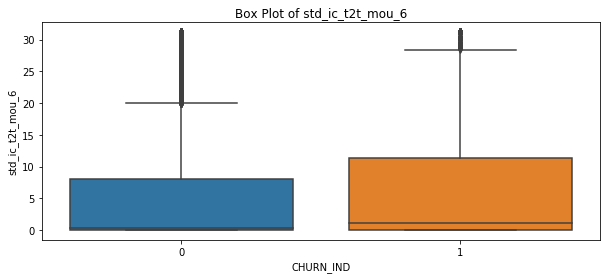

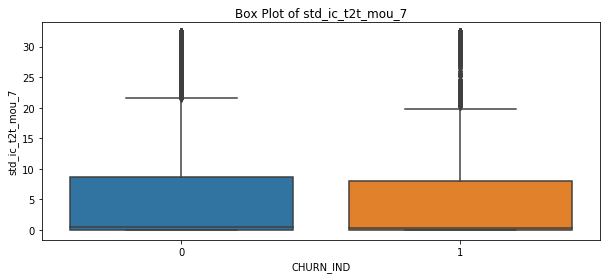

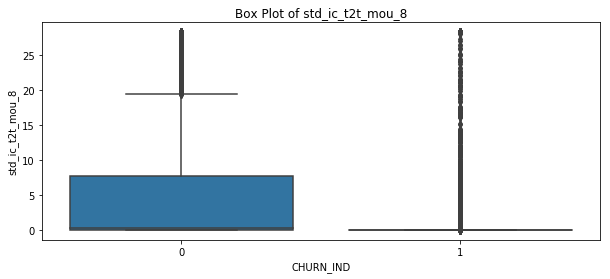

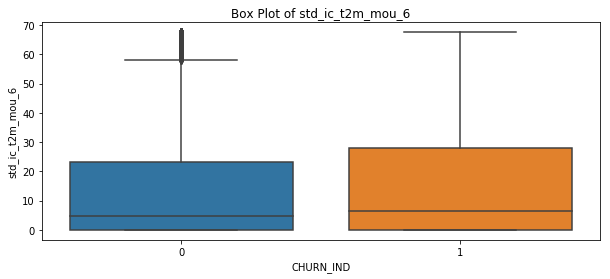

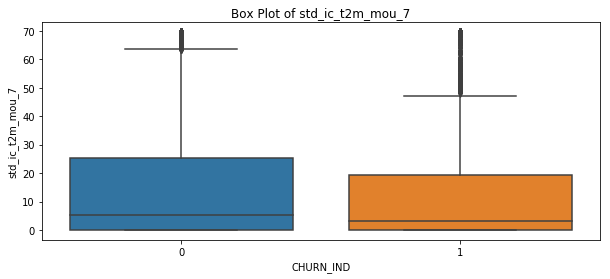

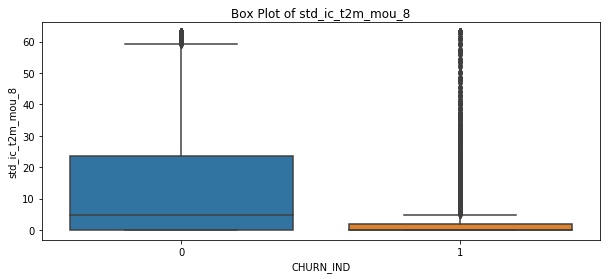

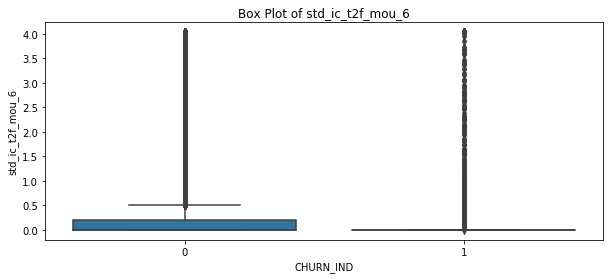

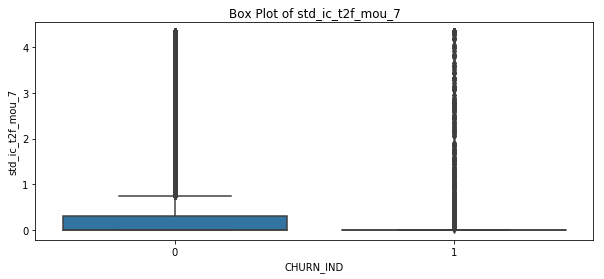

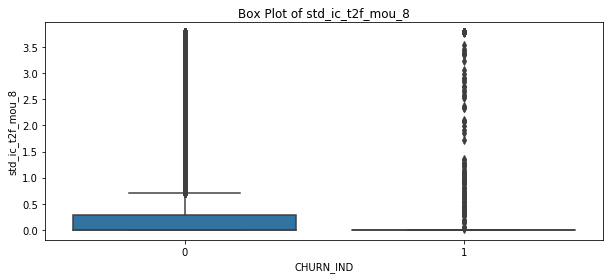

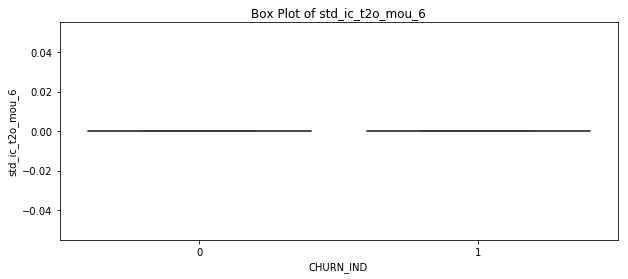

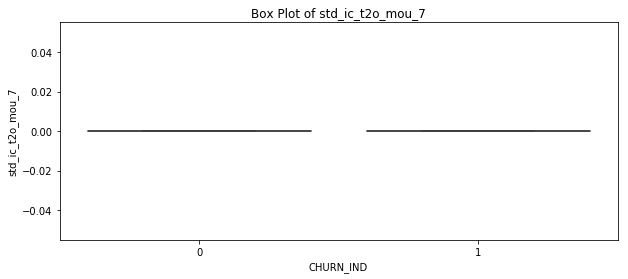

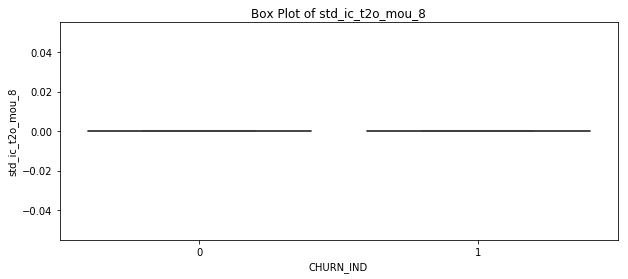

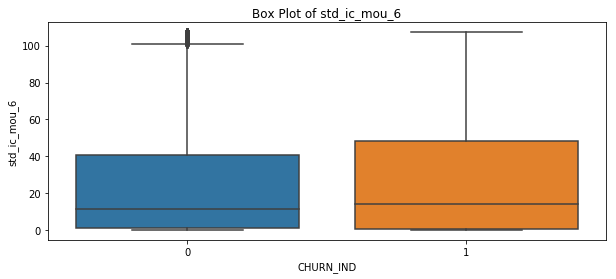

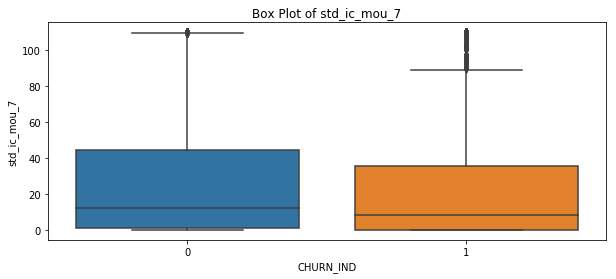

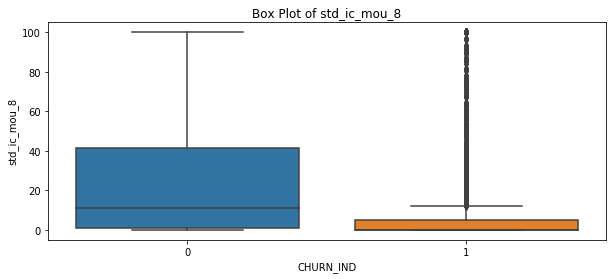

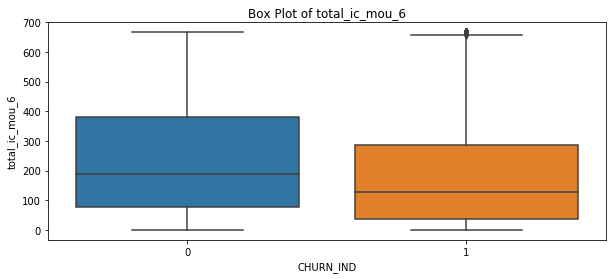

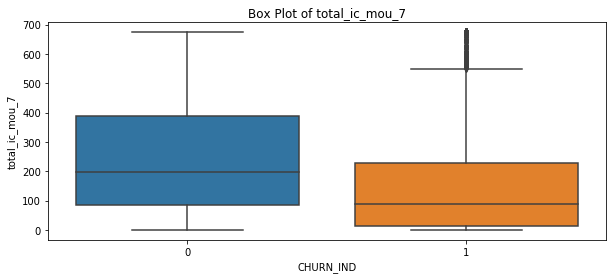

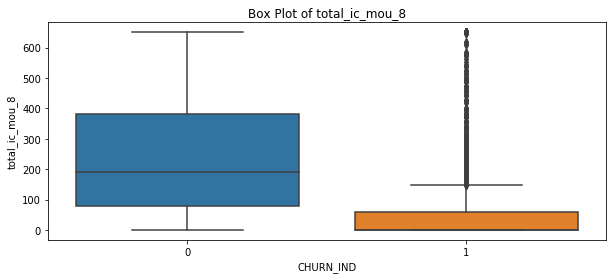

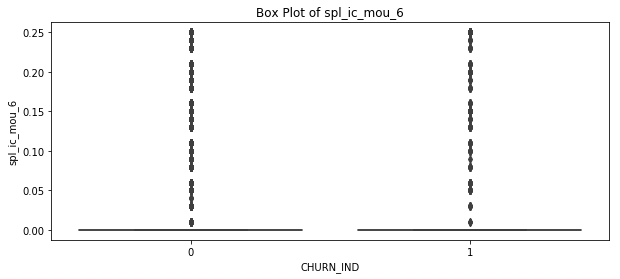

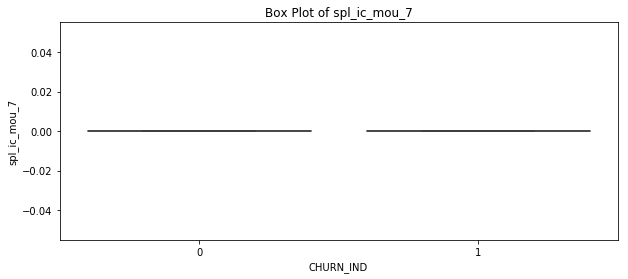

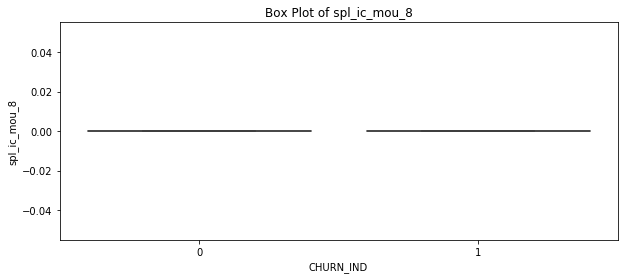

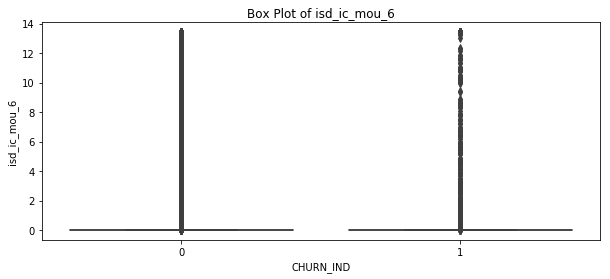

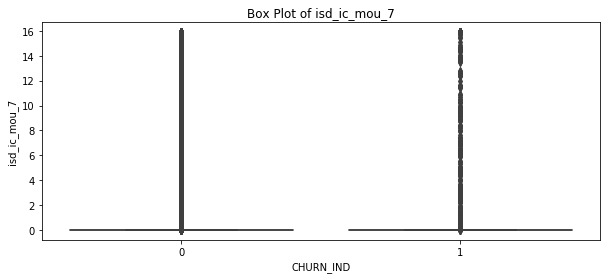

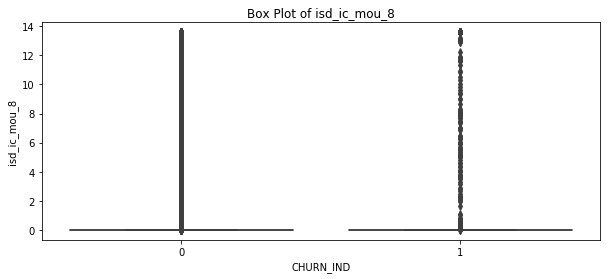

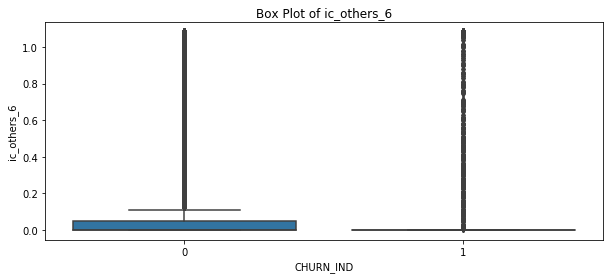

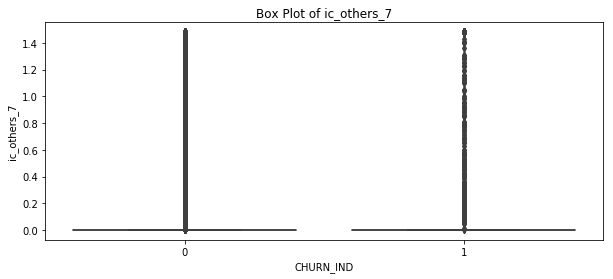

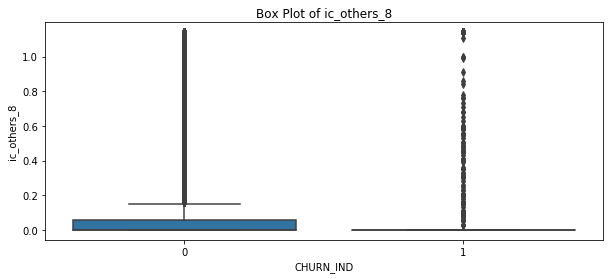

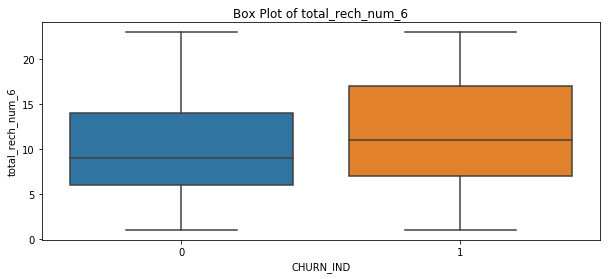

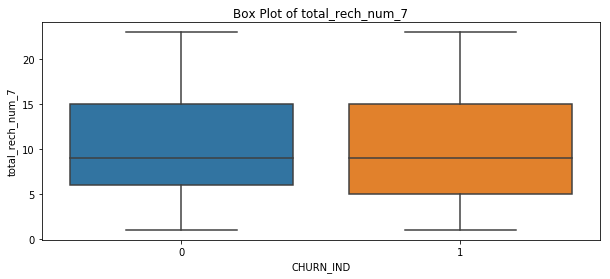

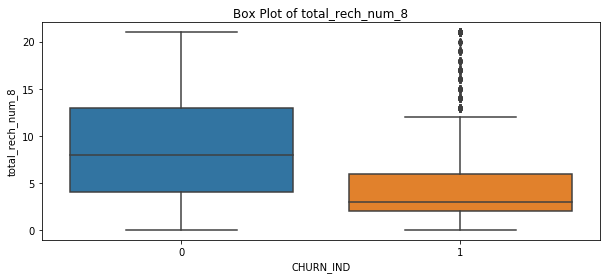

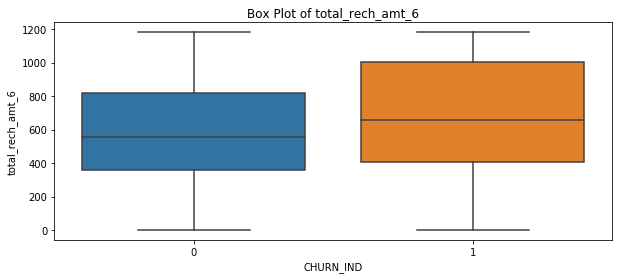

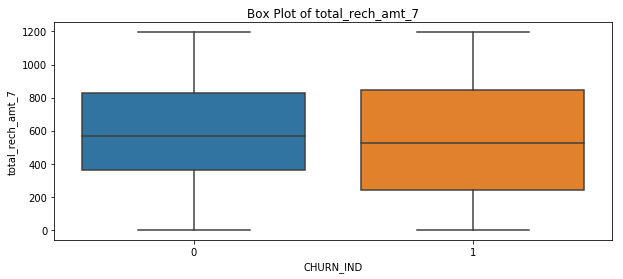

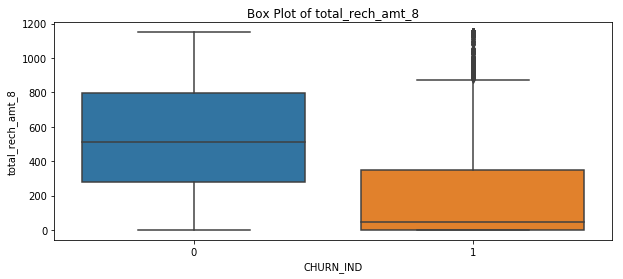

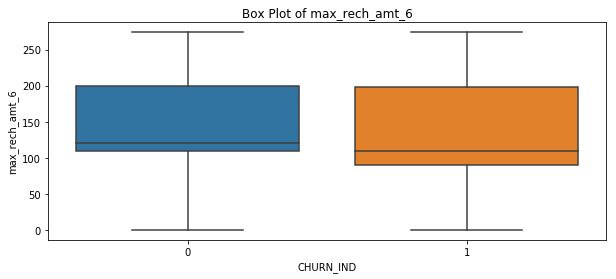

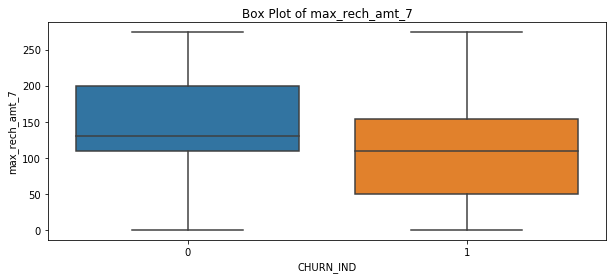

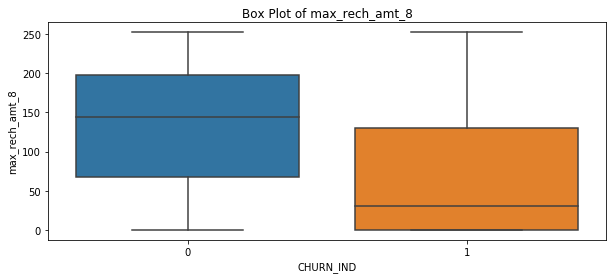

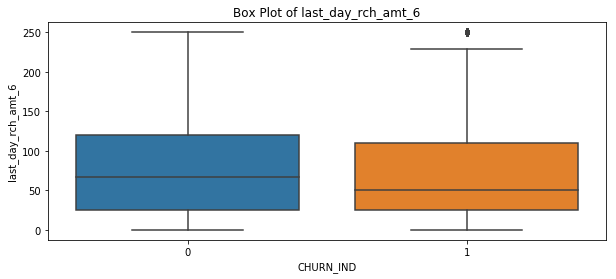

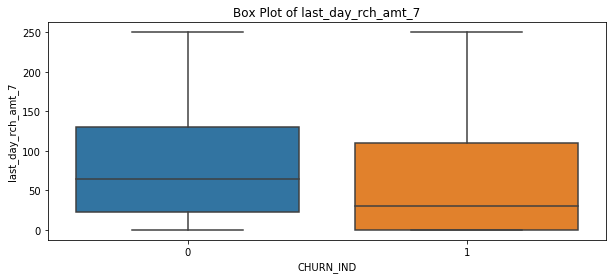

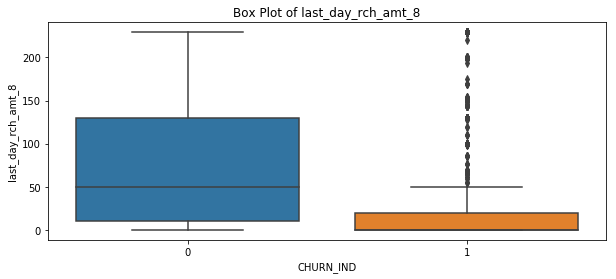

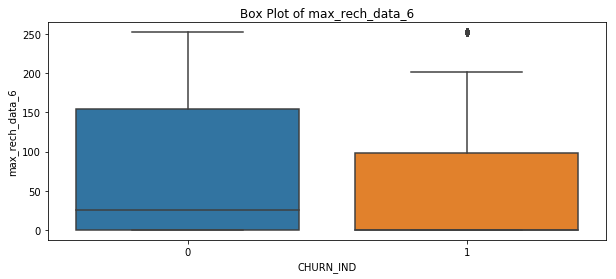

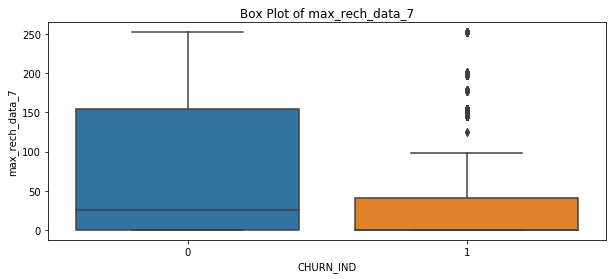

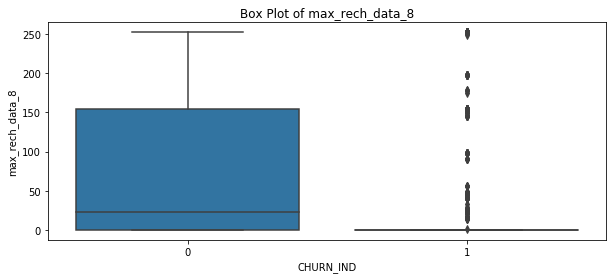

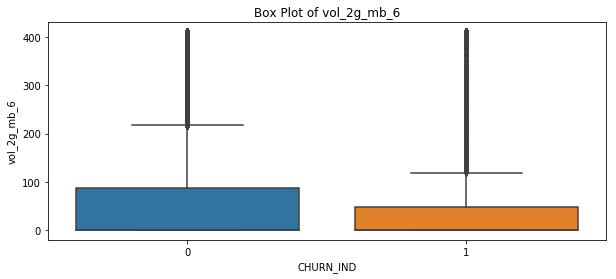

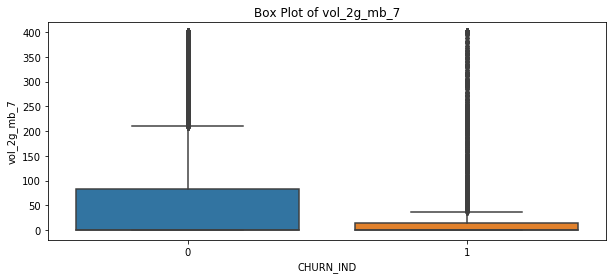

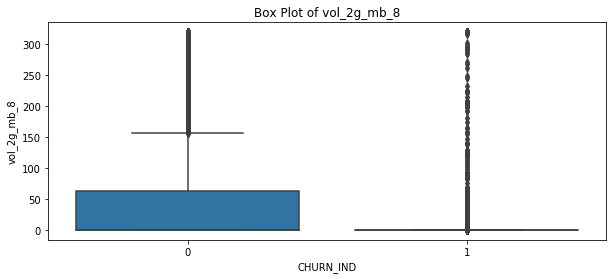

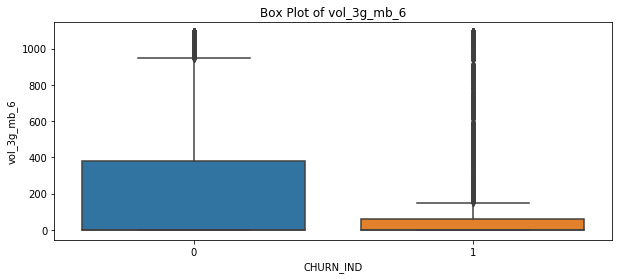

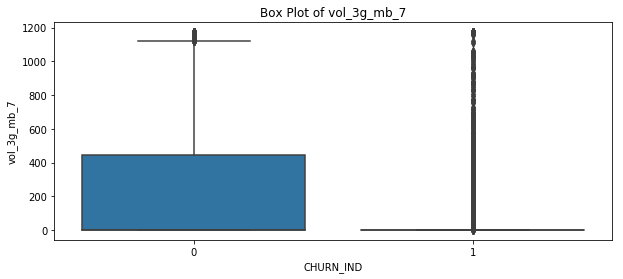

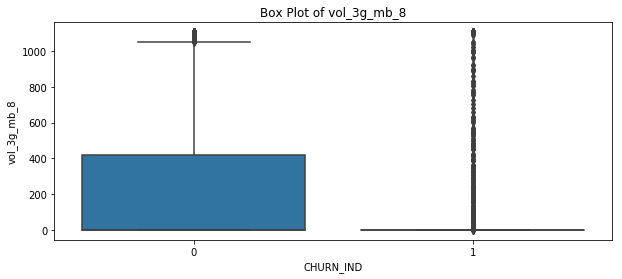

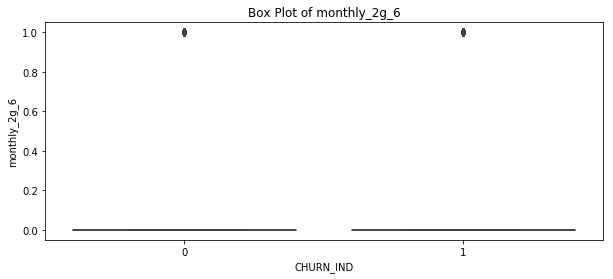

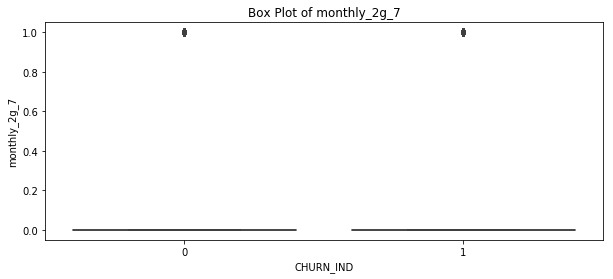

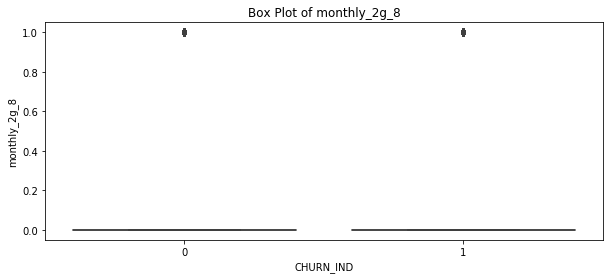

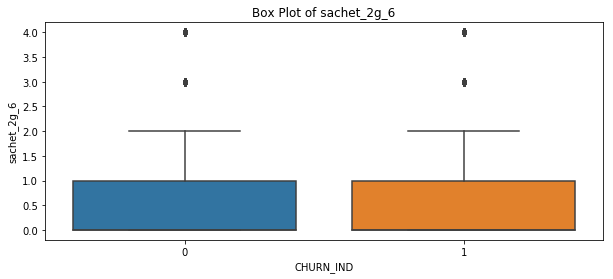

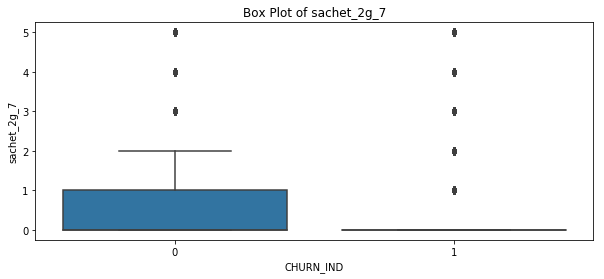

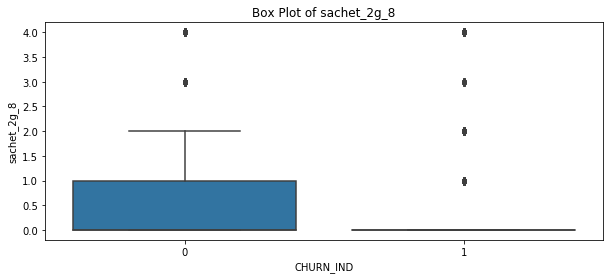

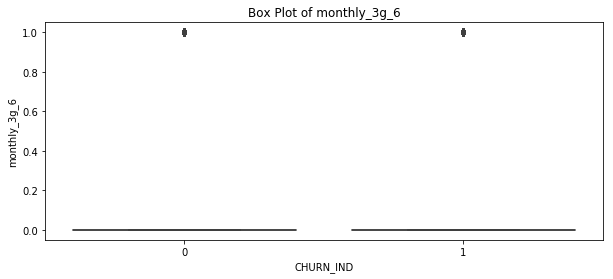

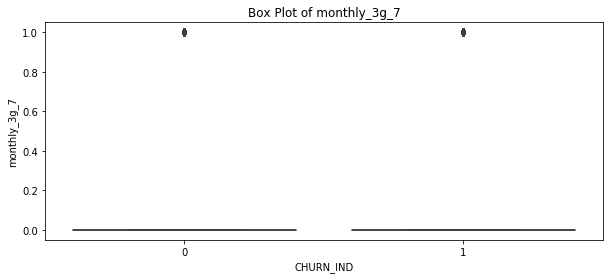

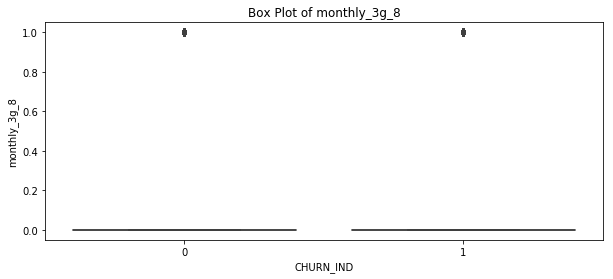

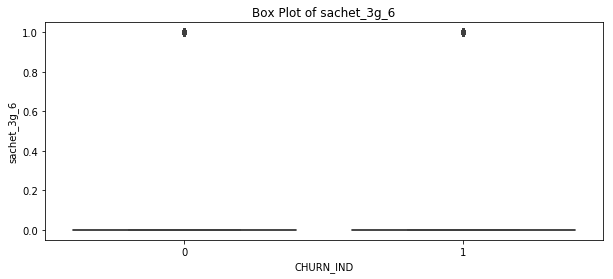

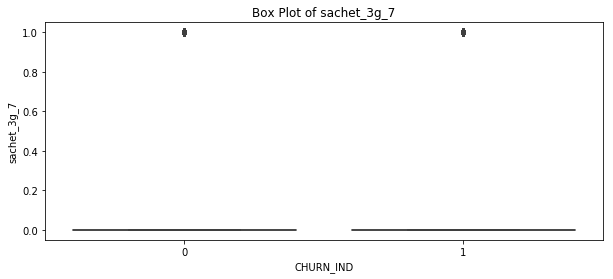

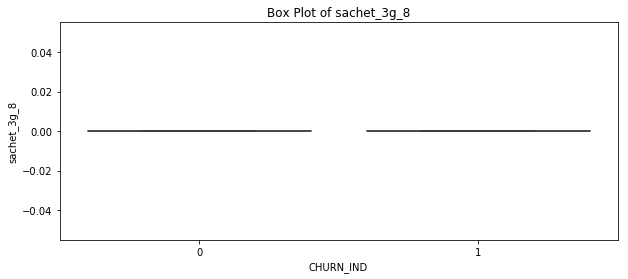

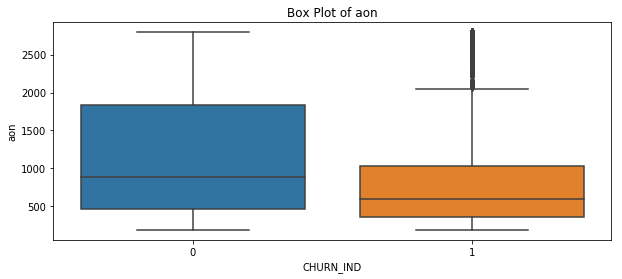

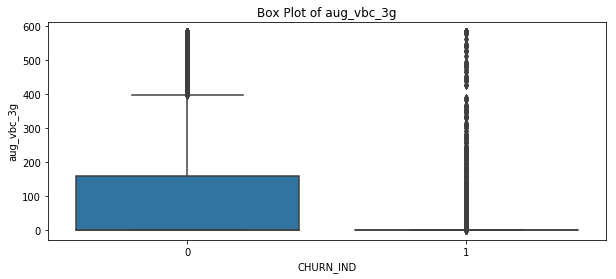

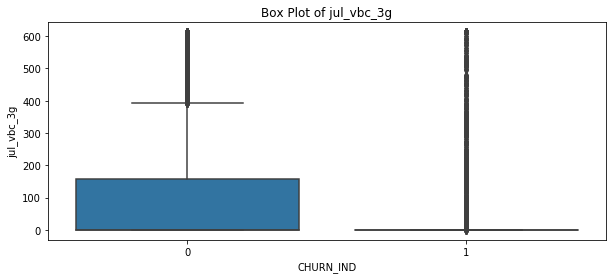

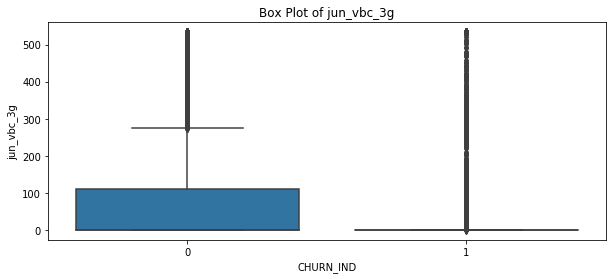

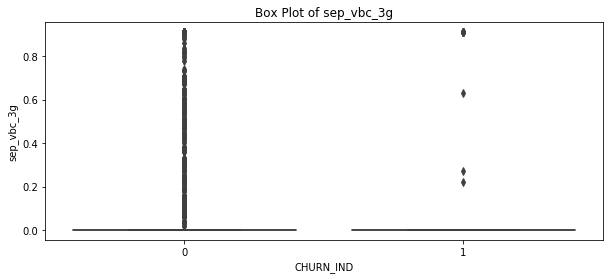

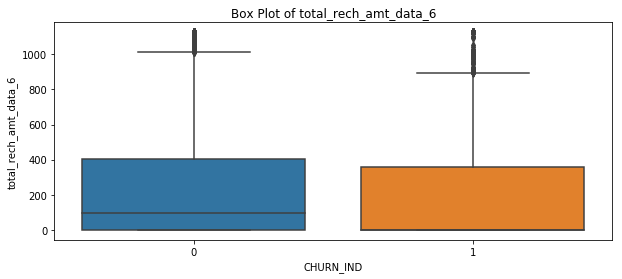

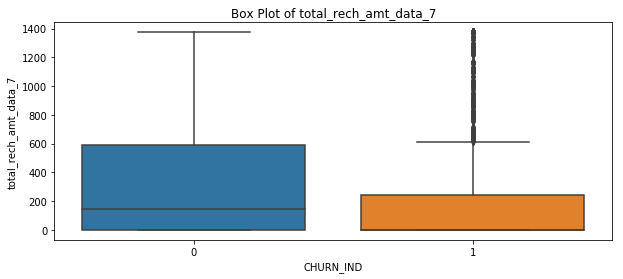

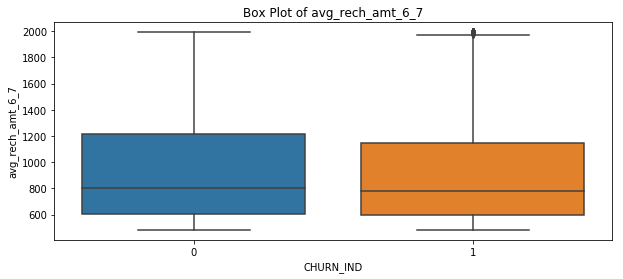

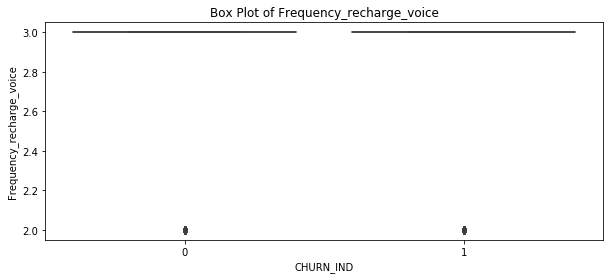

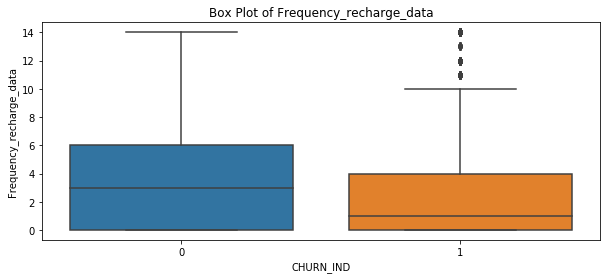

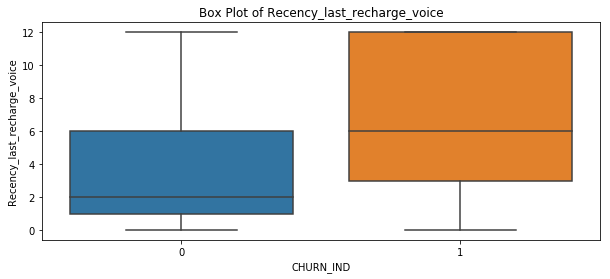

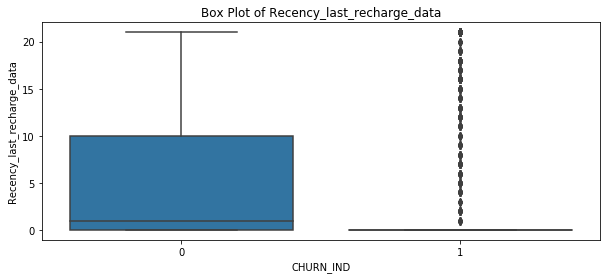

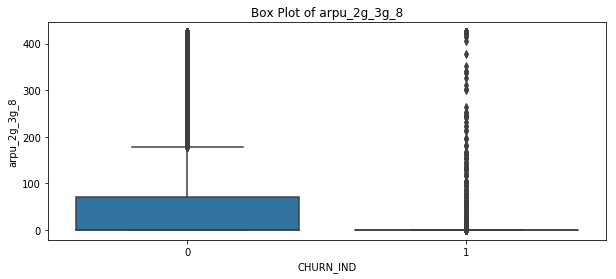

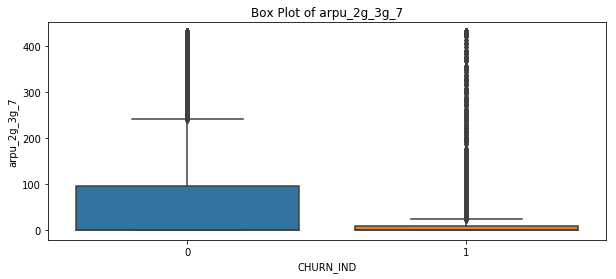

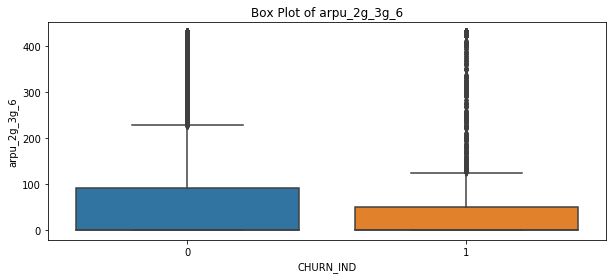

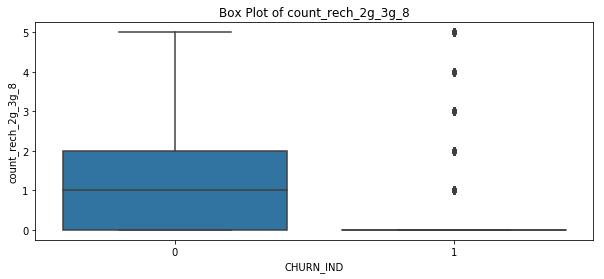

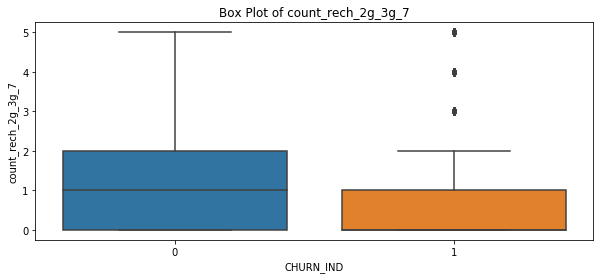

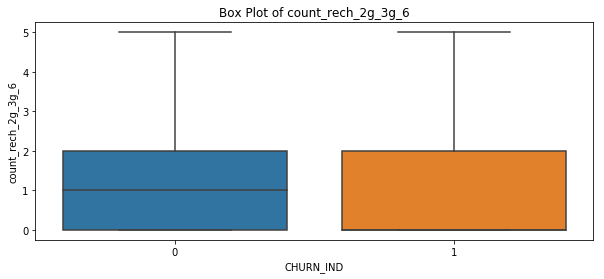

In [403]:
for num_variable in numlist_f:
    fig,axes = plt.subplots(figsize=(10,4))
    sns.boxplot(x='CHURN_IND', y=num_variable, data = telecom_data_new)
    plt.title(str('Box Plot of ') + str(num_variable))

In [404]:
### Write down the observations

In [405]:
##Removing columns having unique value since they are not adding any variability to outr dataset

In [406]:
singlelist=[]
for x in telecom_data_new.columns:
    if (telecom_data_new[x].nunique() == 1):
        singlelist.append(x)

print (singlelist)

['std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'og_others_7', 'og_others_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'spl_ic_mou_7', 'spl_ic_mou_8', 'sachet_3g_8']


In [407]:
telecom_data_new.drop(singlelist,axis=1, inplace=True)

**Working with categorical varaibles**

In [408]:
telecom_data_new[cat_list].head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,CHURN_IND
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
7,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
8,0.0,0.0,0.0,NaN,0.0,0.0,NaN,1.0,1.0,0
21,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0
23,0.0,0.0,0.0,NaN,0.0,0.0,NaN,1.0,1.0,0


In [409]:
telecom_data_new[cat_list].isnull().any()

loc_og_t2o_mou      False
std_og_t2o_mou      False
loc_ic_t2o_mou      False
night_pck_user_6     True
night_pck_user_7     True
night_pck_user_8     True
fb_user_6            True
fb_user_7            True
fb_user_8            True
CHURN_IND           False
dtype: bool

**missing values can be imputed with '-1' where -1 can be treated as a new category**

In [410]:
list_to_replace = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']

In [411]:
telecom_data_new[list_to_replace] = telecom_data_new[list_to_replace].replace(np.nan, -1, regex=True)

In [412]:
for x in cat_list:
    print(x)
    print(telecom_data_new[x].unique())

loc_og_t2o_mou
[0. 1.]
std_og_t2o_mou
[0. 1.]
loc_ic_t2o_mou
[0. 1.]
night_pck_user_6
[ 0. -1.  1.]
night_pck_user_7
[ 0. -1.  1.]
night_pck_user_8
[ 0. -1.  1.]
fb_user_6
[ 1. -1.  0.]
fb_user_7
[ 1. -1.  0.]
fb_user_8
[ 1. -1.  0.]
CHURN_IND
[1 0]


In [413]:
##So we can see there are two types of categorical variables -
#cat_list1 have 3 different categories; while cat_list2 have 3 different categoris

In [414]:
cat_list1 = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou']
cat_list2 = ['night_pck_user_6','night_pck_user_7', 'night_pck_user_8','fb_user_6','fb_user_7','fb_user_8' ]

**Looking into the categorical data**

In [415]:
# lets define a function to plot loan_status across categorical variables
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='CHURN_IND', data=telecom_data_new)
    plt.show()

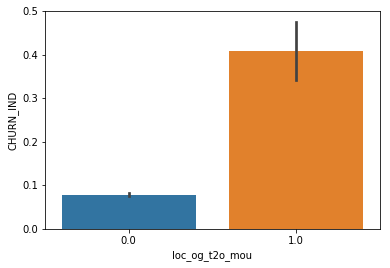

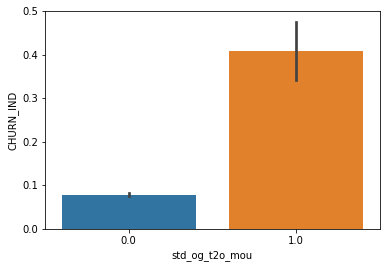

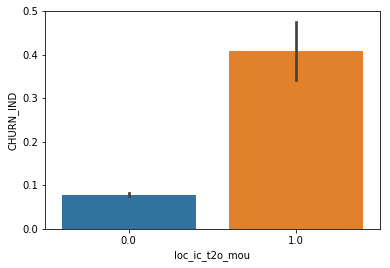

In [416]:
for x in cat_list1:
    plot_cat(x)

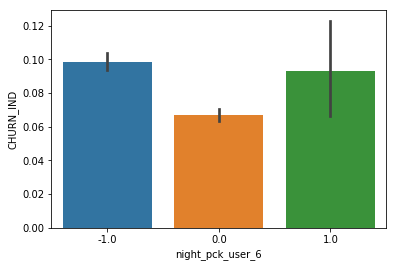

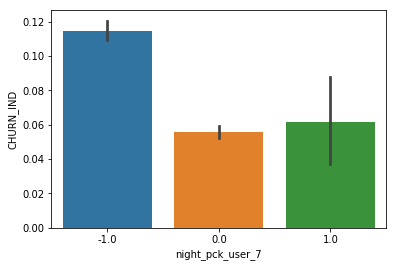

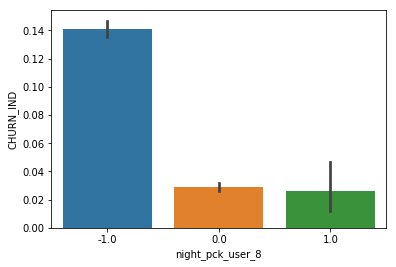

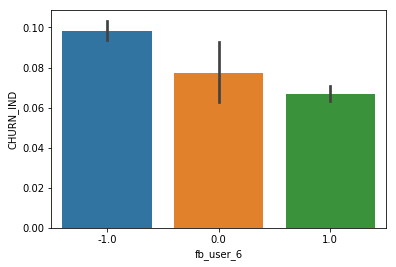

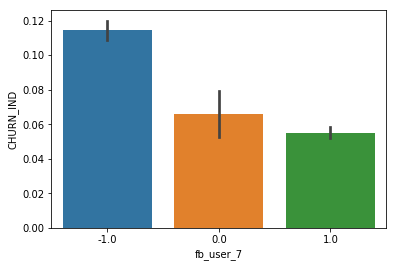

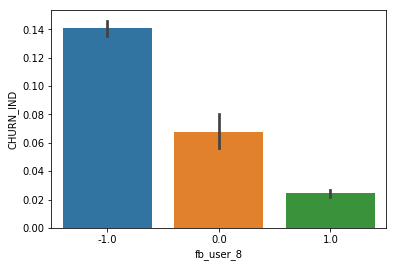

In [417]:
for x in cat_list2:
    plot_cat(x)

In [418]:
### Write down the observations

In [419]:
telecom_data_new.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,Frequency_recharge_data,Recency_last_recharge_voice,Recency_last_recharge_data,CHURN_IND,arpu_2g_3g_8,arpu_2g_3g_7,arpu_2g_3g_6,count_rech_2g_3g_8,count_rech_2g_3g_7,count_rech_2g_3g_6
0,7000842753,0.0,0.0,0.0,197.3850,214.8160,213.8030,0.00,0.00,0.00,...,3.0,12.0,21.0,1,424.34,424.34,424.34,1.0,1.0,1.0
7,7000701601,0.0,0.0,0.0,994.4086,996.1706,977.5464,57.84,54.68,52.29,...,0.0,5.0,0.0,1,0.00,0.00,0.00,0.0,0.0,0.0
8,7001524846,0.0,0.0,0.0,378.7210,492.2230,137.3620,413.69,351.03,35.08,...,5.0,1.0,8.0,0,19.83,0.00,0.00,3.0,2.0,0.0
21,7002124215,0.0,0.0,0.0,514.4530,597.7530,637.7600,102.41,132.11,85.14,...,0.0,0.0,0.0,0,0.00,0.00,0.00,0.0,0.0,0.0
23,7000887461,0.0,0.0,0.0,74.3500,193.8970,366.9660,48.96,50.66,33.58,...,4.0,7.0,21.0,0,347.94,430.08,0.00,2.0,2.0,0.0


**Replacing the categorical varaibles with percentage of churn -**

In [420]:
##For list 1

In [421]:
for catvar in cat_list2:
    print(catvar)
    to = telecom_data_new.groupby([catvar, 'CHURN_IND']).agg({'mobile_number': 'sum'})
    # Change: groupby state_office and divide by sum
    to_pcts = to.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
    pct0 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == 0.0)].round(1)
    pct1 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == 1.0)].round(1)
    pct3 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == -1.0)].round(1)
    var0 = float(pct0)
    var1 = float(pct1)
    var2 = float(pct3)
    print(var0)
    print(var1)
    print(var2)
    telecom_data_new[catvar].replace({0.0 : var0, 1.0 : var1, -1.0 : var2}, axis=1,inplace=True)

night_pck_user_6
6.7
9.3
9.8
night_pck_user_7
5.6
6.1
11.5
night_pck_user_8
2.9
2.6
14.1
fb_user_6
7.7
6.7
9.8
fb_user_7
6.6
5.5
11.5
fb_user_8
6.8
2.4
14.1


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:4480: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warnings.warn('the "axis" argument is deprecated '


In [422]:
##For List2

In [423]:
for catvar in cat_list1:
    print(catvar)
    to = telecom_data_new.groupby([catvar, 'CHURN_IND']).agg({'mobile_number': 'sum'})
    # Change: groupby state_office and divide by sum
    to_pcts = to.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index()
    print(to_pcts)
    pct0 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == 0.0)].round(1)
    pct1 = to_pcts.mobile_number[(to_pcts.CHURN_IND==1) & (to_pcts[catvar] == 1.0)].round(1)
    var0 = float(pct0)
    var1 = float(pct1)
    print(var0)
    print(var1)
    telecom_data_new[catvar].replace({0.0 : var0, 1.0 : var1}, axis=1,inplace=True)

loc_og_t2o_mou
   loc_og_t2o_mou  CHURN_IND  mobile_number
0             0.0          0      92.122510
1             0.0          1       7.877490
2             1.0          0      59.193219
3             1.0          1      40.806781
7.9
40.8
std_og_t2o_mou
   std_og_t2o_mou  CHURN_IND  mobile_number
0             0.0          0      92.122510
1             0.0          1       7.877490
2             1.0          0      59.193219
3             1.0          1      40.806781
7.9
40.8
loc_ic_t2o_mou
   loc_ic_t2o_mou  CHURN_IND  mobile_number
0             0.0          0      92.122510
1             0.0          1       7.877490
2             1.0          0      59.193219
3             1.0          1      40.806781
7.9
40.8


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:4480: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warnings.warn('the "axis" argument is deprecated '


## 3. MODEL CREATION

**MODEL 1** -  the main objective of identifying important predictor attributes which help the business 
    understand indicators of churn. 

In [424]:
telecom_data_bkup = telecom_data_new
#will delete later

In [425]:
telecom_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 144 entries, mobile_number to count_rech_2g_3g_6
dtypes: float64(142), int64(2)
memory usage: 34.4 MB


In [426]:
##Checking for multicollinearity
telecom_data_new_corr=telecom_data_new.corr()

In [427]:
telecom_data_new_corr.to_csv('telecom_data_new_corr.csv')

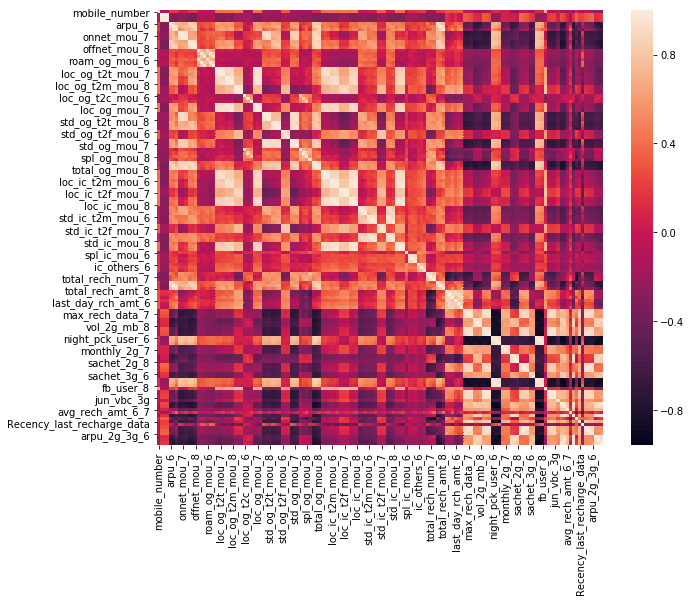

In [428]:
plt.figure(figsize=(10,8))
sns.heatmap(telecom_data_new_corr.corr())

In [484]:
#chossing columns
cols = telecom_data_new.columns.difference( ['CHURN_IND', 'mobile_number'])

In [485]:
X = telecom_data_new[cols ]
Y = telecom_data_new['CHURN_IND']
df_test = telecom_data_new[cols ][telecom_data_new.CHURN_IND == 0]
#this will be our validation set
df_test_mobile = telecom_data_new['mobile_number' ][telecom_data_new.CHURN_IND == 0]

In [486]:

train_X, test_X, train_y, test_y = train_test_split( X,
                                                  Y,
                                                  test_size = 0.3,
                                                  random_state = 123)

In [487]:
len(train_X)

20967

In [488]:
len(test_X)

8986

### Applying SMOTE

In [489]:
train_X.head()

,Frequency_recharge_data,Frequency_recharge_voice,Recency_last_recharge_data,Recency_last_recharge_voice,aon,arpu_2g_3g_6,arpu_2g_3g_7,arpu_2g_3g_8,arpu_6,arpu_7,...,total_rech_amt_data_7,total_rech_num_6,total_rech_num_7,total_rech_num_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
38354,1.0,3.0,21.0,1.0,1323.0,0.00,0.00,0.0,574.3300,740.520,...,0.0,22.0,23.0,21.0,0.00,0.00,0.00,0.000,0.00,0.000
31724,4.0,3.0,14.0,3.0,2793.0,424.35,430.08,424.5,910.4450,844.624,...,252.0,7.0,5.0,5.0,60.24,35.79,55.14,815.340,825.77,1105.508
80474,2.0,3.0,0.0,7.0,1021.0,424.34,430.08,0.0,536.9000,625.696,...,252.0,3.0,4.0,3.0,0.06,21.50,0.00,109.580,423.92,0.000
33458,4.0,3.0,18.0,0.0,516.0,430.18,425.74,424.5,994.4086,576.724,...,252.0,10.0,5.0,6.0,38.26,139.80,155.35,1089.948,1017.61,1105.508
12559,0.0,3.0,0.0,0.0,538.0,0.00,0.00,0.0,636.7440,497.362,...,0.0,8.0,5.0,4.0,0.00,0.00,0.00,0.000,0.00,0.000


In [490]:
sm = SMOTE(random_state=123, ratio = 1)
x_train_res, y_train_res = sm.fit_sample(train_X,  train_y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [491]:
#checking data uniformity
y = np.bincount(y_train_res)
ii = np.nonzero(y)[0]

np.vstack((ii,y[ii])).T

array([[    0, 19232],
       [    1, 19232]], dtype=int64)

### Implementing RFE

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [126]:
#logreg = LogisticRegression()
#rfe = RFE(logreg, 20) 

In [127]:
# running RFE with 20 variables as output
#rfe2 = rfe.fit(x_train_res,y_train_res)

In [128]:
#RFECols2 = x_train_res.columns[rfe2.support_]
#RFECols2

Index(['Frequency_recharge_data', 'Frequency_recharge_voice',
       'Recency_last_recharge_voice', 'count_rech_2g_3g_8', 'fb_user_7',
       'fb_user_8', 'ic_others_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_7', 'monthly_3g_8', 'night_pck_user_7',
       'night_pck_user_8', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sep_vbc_3g', 'std_ic_t2f_mou_8', 'std_og_t2f_mou_8'],
      dtype='object')

In [120]:
top20cols = ['Frequency_recharge_data', 'Frequency_recharge_voice',
       'Recency_last_recharge_voice', 'count_rech_2g_3g_8', 'fb_user_7',
       'fb_user_8', 'ic_others_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_7', 'monthly_3g_8', 'night_pck_user_7',
       'night_pck_user_8', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sep_vbc_3g', 'std_ic_t2f_mou_8', 'std_og_t2f_mou_8']

In [121]:
top50cols = ['Frequency_recharge_data', 'Frequency_recharge_voice',
       'Recency_last_recharge_data', 'Recency_last_recharge_voice',
       'count_rech_2g_3g_6', 'count_rech_2g_3g_7', 'count_rech_2g_3g_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'ic_others_6', 'ic_others_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'last_day_rch_amt_8',
       'loc_ic_t2f_mou_8', 'loc_ic_t2o_mou', 'loc_ic_t2t_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_t2o_mou', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_7', 'monthly_3g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'og_others_6', 'roam_ic_mou_8',
       'roam_og_mou_7', 'roam_og_mou_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sep_vbc_3g',
       'spl_ic_mou_6', 'spl_og_mou_8', 'std_ic_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2t_mou_8', 'std_og_t2f_mou_8', 'std_og_t2o_mou',
       'total_rech_num_7', 'total_rech_num_8']

In [201]:
##Working with top 20 rows
X_NEW = telecom_data_new[top50cols ]
Y_NEW = telecom_data_new['CHURN_IND']

X_train, X_test, y_train, y_test = train_test_split( X_NEW,
                                                  Y_NEW,
                                                  test_size = 0.3,
                                                  random_state = 123)

In [202]:
X_train.columns

Index(['Frequency_recharge_data', 'Frequency_recharge_voice',
       'Recency_last_recharge_data', 'Recency_last_recharge_voice',
       'count_rech_2g_3g_6', 'count_rech_2g_3g_7', 'count_rech_2g_3g_8',
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'ic_others_6', 'ic_others_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'last_day_rch_amt_8',
       'loc_ic_t2f_mou_8', 'loc_ic_t2o_mou', 'loc_ic_t2t_mou_8',
       'loc_og_t2c_mou_8', 'loc_og_t2o_mou', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'monthly_3g_7', 'monthly_3g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'og_others_6', 'roam_ic_mou_8',
       'roam_og_mou_7', 'roam_og_mou_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sep_vbc_3g',
       'spl_ic_mou_6', 'spl_og_mou_8', 'std_ic_mou_7', 'std_ic_t2f_mou_8',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
       'std_ic_t2t_mou_8', 'std_og_t2f_mou_8', 'std_og_t2o_mou',
       'total_rech_n

### BUILDING RANDOM FOREST MODEL

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=1000 )
radm_clf.fit( X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [205]:
radm_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': radm_clf.predict( X_test ) } )

In [206]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.9478077008680169

Text(0.5,15,'Predicted label')

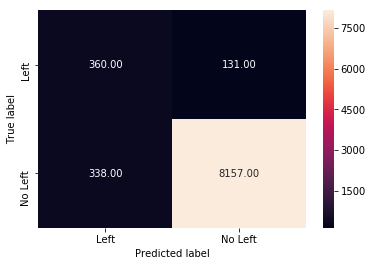

In [207]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Feature importance from the Random Forest Model

In [208]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

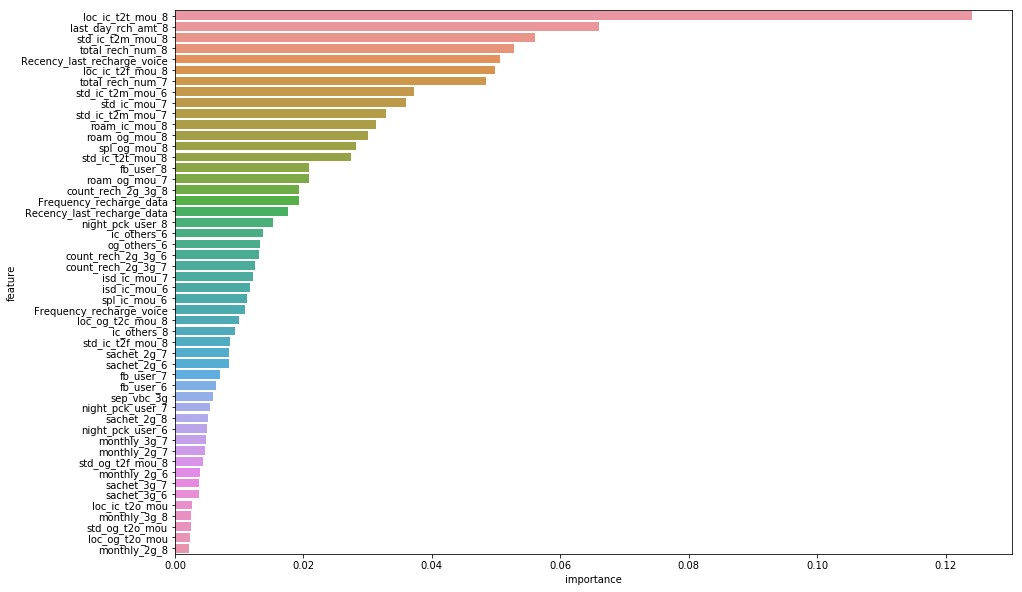

In [209]:
# the size of A4 paper

plt.figure(figsize=(15,10))
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

In [210]:
<b> Note: </b>
As per the model, the most important features which influence whether to leave the company,in descending order, are

#write down the observations

SyntaxError: invalid syntax (<ipython-input-210-ad0061746e76>, line 1)

### MODEL 2 - TO PREDICT CHURNERS

In [562]:
cols = telecom_data_new.columns.difference( ['CHURN_IND', 'mobile_number'] )

In [563]:
X = telecom_data_new[cols ]
Y = telecom_data_new['CHURN_IND']

In [564]:
X.count()[0]

29953

In [565]:
df_test.count()[0]

27520

#### Standardizing the data

In [566]:
from sklearn.preprocessing import StandardScaler

In [522]:
sc=StandardScaler()

In [567]:
x_train_scaled=sc.fit_transform(X)

In [568]:
x_test_scaled=sc.fit_transform(df_test)

In [569]:
print(len(x_train_scaled))
print(len(x_test_scaled))

29953
27520


#### Dividing the data into train and test

In [570]:
from sklearn.cross_validation import train_test_split


train_X, test_X, train_y, test_y = train_test_split( x_train_scaled,
                                                  Y,
                                                  test_size = 0.3,
                                                  random_state = 123)

In [571]:
print(len(train_X), len(test_X))

20967 8986


#### Applying SMOTE

In [572]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=123, ratio = 1)
x_train_res, y_train_res = sm.fit_sample(train_X,  train_y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


In [573]:
len(x_train_res)

38464

In [574]:
import numpy as np
y = np.bincount(y_train_res)
ii = np.nonzero(y)[0]

np.vstack((ii,y[ii])).T

array([[    0, 19232],
       [    1, 19232]], dtype=int64)

### Applying PCA

In [641]:
#Improting the PCA module
from sklearn.decomposition import PCA

In [642]:
var_ratio={}
for n in range(2,50):
    pca = PCA(n_components=n, random_state = 123)
    telePCA = pca.fit(x_train_res)
    var_ratio[n]=sum(telePCA.explained_variance_ratio_)

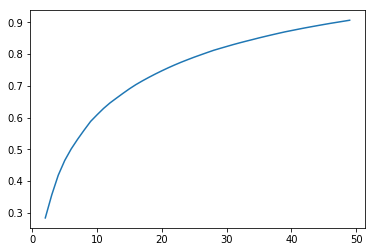

In [643]:
#Making the screeplot - plotting the cumulative variance against the number of components
pd.Series(var_ratio).plot()

In [644]:
var_ratio

{2: 0.28385083938597744,
 3: 0.3564738851370619,
 4: 0.41834863601747635,
 5: 0.4648125513877368,
 6: 0.5012711499869199,
 7: 0.532029906303051,
 8: 0.5606480915173256,
 9: 0.5880472647090855,
 10: 0.6089532264145279,
 11: 0.62893927120638,
 12: 0.6464524365207278,
 13: 0.6615809307389745,
 14: 0.6765147014706397,
 15: 0.6908975139295089,
 16: 0.7040791117491848,
 17: 0.715846595308883,
 18: 0.7269584556735047,
 19: 0.7375267758223628,
 20: 0.7475447668998623,
 21: 0.7571407100719537,
 22: 0.7661921863290504,
 23: 0.7747405212388349,
 24: 0.782750580283335,
 25: 0.7905439030423397,
 26: 0.7978329599312524,
 27: 0.8050778383665517,
 28: 0.8121512617968902,
 29: 0.8182049694278714,
 30: 0.8241133414387251,
 31: 0.8300294091959822,
 32: 0.8355598098155238,
 33: 0.8408420320415791,
 34: 0.8459537657753001,
 35: 0.8512057395925537,
 36: 0.8561196041930477,
 37: 0.860932213432297,
 38: 0.865615063896889,
 39: 0.8702115027772839,
 40: 0.8742808863723377,
 41: 0.8783686492465613,
 42: 0.882371

In [645]:
#90% variance
pc_final=PCA(n_components=45)
df_train_pca=pc_final.fit_transform(x_train_res)

In [646]:
df_train_pca.shape

(38464, 45)

In [647]:
x_train_scaled.shape

(29953, 142)

In [582]:
pd.DataFrame(pc_final.components_.T, columns=['PC_' + str(i) for i in range(45)], index=cols)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44
Frequency_recharge_data,-0.108051,0.088852,-0.142098,0.112309,0.113439,0.079368,0.067617,-0.012677,0.068491,0.003439,...,0.001638,-0.028777,0.001966,0.003198,-0.043707,-0.050482,-0.013110,0.000435,-0.019741,0.006816
Frequency_recharge_voice,0.059908,0.072852,-0.001054,0.245261,0.015868,-0.262524,0.063070,-0.121123,0.220764,-0.067916,...,0.021801,0.068529,-0.035258,0.045175,0.003907,0.022280,-0.020806,0.085409,-0.038716,0.003824
Recency_last_recharge_data,-0.050582,0.094022,-0.024516,0.057878,-0.017272,0.043869,-0.015035,0.001336,-0.026494,0.028994,...,0.063464,0.184125,-0.089248,0.002378,0.061308,0.343509,-0.029445,0.165154,0.155568,-0.134730
Recency_last_recharge_voice,-0.060016,-0.040076,0.030719,-0.149746,-0.066678,0.115314,-0.017868,0.025571,-0.079820,-0.072546,...,0.062167,0.165291,0.034076,-0.074079,0.041855,-0.271256,0.088210,0.090284,-0.354491,0.147723
aon,0.034357,0.071245,0.005596,-0.059218,-0.028471,-0.070633,0.019888,-0.038197,-0.013612,0.034184,...,-0.117585,0.107171,0.197695,-0.013010,0.408847,-0.351398,-0.569458,0.090977,0.135485,-0.072069
arpu_2g_3g_6,-0.082771,0.104178,0.093674,0.025632,-0.113087,0.157093,-0.066670,0.015867,0.002423,0.057736,...,-0.018555,0.087606,0.014715,-0.036720,-0.001667,-0.071407,0.020029,-0.200771,0.134617,0.032526
arpu_2g_3g_7,-0.065066,0.112139,0.072944,0.075342,-0.107720,0.063958,-0.082271,0.030457,0.009174,-0.178531,...,0.039889,0.069467,-0.069240,0.059589,0.073930,-0.007815,-0.037612,0.112661,-0.155911,-0.031711
arpu_2g_3g_8,-0.039218,0.110042,0.058612,0.082972,-0.094957,0.046104,-0.060025,0.011041,0.024914,0.003940,...,-0.011189,-0.164185,0.084429,-0.033315,-0.005750,-0.023813,0.016588,0.080792,0.026708,0.019551
arpu_6,0.121213,-0.013882,0.071733,-0.038483,-0.061368,0.244298,-0.027354,-0.031923,0.166634,0.130708,...,0.032953,-0.057156,-0.033036,0.057999,0.076692,0.055522,0.030831,0.003861,-0.001333,0.035337
arpu_7,0.151557,0.038400,0.060159,0.110601,-0.043797,0.004292,-0.065888,0.042056,0.098128,-0.215313,...,0.035276,0.029558,0.002855,-0.045284,0.043616,0.044622,0.037992,0.039801,-0.040954,0.018323


In [648]:
df_test_pca = pc_final.transform(test_X)
df_test_pca.shape

(8986, 45)

In [649]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

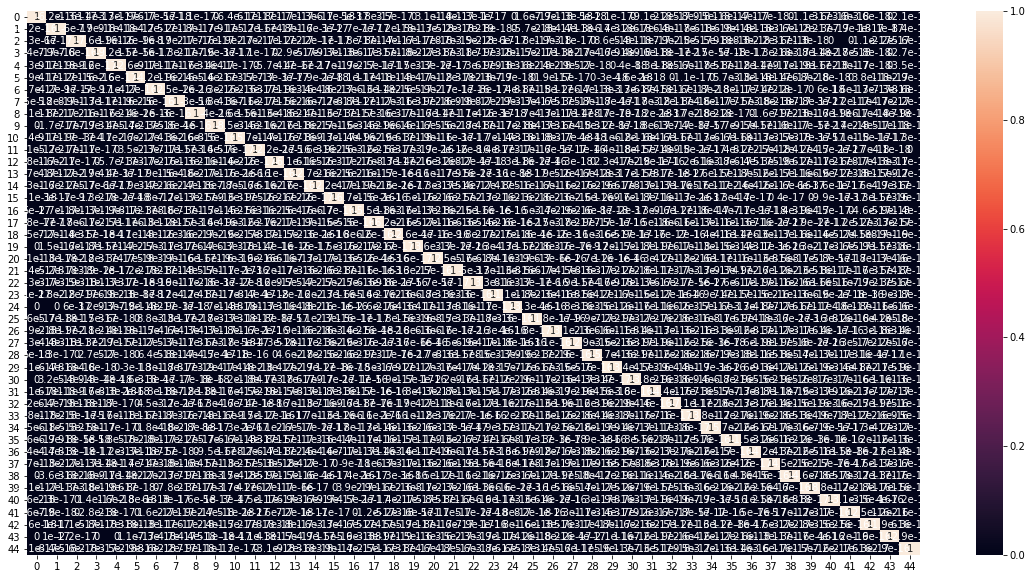

In [650]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [586]:
pd.Series(pc_final.explained_variance_ratio_,index=['PC_' + str(i) for i in range(45)])

PC_0     0.157148
PC_1     0.124641
PC_2     0.063791
PC_3     0.056580
PC_4     0.039193
PC_5     0.027931
PC_6     0.027410
PC_7     0.023355
PC_8     0.023087
PC_9     0.020586
PC_10    0.019148
PC_11    0.017766
PC_12    0.016574
PC_13    0.015520
PC_14    0.015252
PC_15    0.014437
PC_16    0.013502
PC_17    0.012809
PC_18    0.011782
PC_19    0.011412
PC_20    0.010615
PC_21    0.010063
PC_22    0.009391
PC_23    0.009042
PC_24    0.009025
PC_25    0.007562
PC_26    0.007303
PC_27    0.007176
PC_28    0.006961
PC_29    0.006687
PC_30    0.006547
PC_31    0.006440
PC_32    0.006360
PC_33    0.006167
PC_34    0.005796
PC_35    0.005748
PC_36    0.005627
PC_37    0.005269
PC_38    0.005187
PC_39    0.005111
PC_40    0.004915
PC_41    0.004551
PC_42    0.004436
PC_43    0.004327
PC_44    0.004149
dtype: float64

In [651]:
#Training the model on the train data

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(df_train_pca,y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Making Predictions

In [653]:
#Making prediction on the test data
pred_probs_test = logsk.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(test_y, pred_probs_test))

'0.92'

In [655]:
#Predicting the test cases
test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logsk.predict( df_test_pca ) } )

In [656]:
test_pred = test_pred.reset_index()

In [657]:
#Comparing the predictions with actual test data
test_pred.sample( n = 10 )

,index,actual,predicted
8072,74064,0,0
6085,39818,0,1
6827,53838,0,0
519,63299,0,0
5570,31178,0,0
980,56980,0,0
5512,96170,0,0
5289,95073,1,1
5272,81793,0,0
5556,6734,0,0


In [658]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( test_pred.actual,
                            test_pred.predicted, [1,0] )
cm

array([[ 592,  106],
       [1181, 7107]], dtype=int64)

Text(0.5,15,'Predicted label')

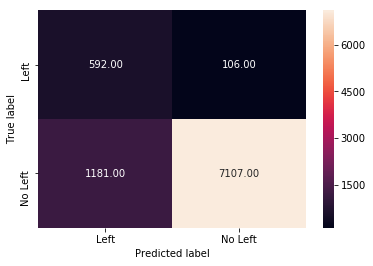

In [659]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [661]:
##This is good preduction of churn(left)

In [662]:
#How good the model is?
predict_proba_df = pd.DataFrame( logsk.predict_proba( df_test_pca ) )
predict_proba_df.head()

,0,1
0,0.985155,0.014845
1,0.730094,0.269906
2,0.999870,0.000130
3,0.701031,0.298969
4,0.041495,0.958505


In [663]:
test_pred = pd.concat( [test_pred, predict_proba_df], axis = 1 )

In [664]:
test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [668]:
test_pred.head()

,index,actual,predicted,Left_0,Left_1
0,94436,0,0,0.985155,0.014845
1,72272,0,0,0.730094,0.269906
2,56618,0,0,0.999870,0.000130
3,56539,0,0,0.701031,0.298969
4,19506,0,1,0.041495,0.958505


In [665]:
auc_score = metrics.roc_auc_score( test_pred.actual, test_pred.Left_1  )
round( float( auc_score ), 2 )

0.92

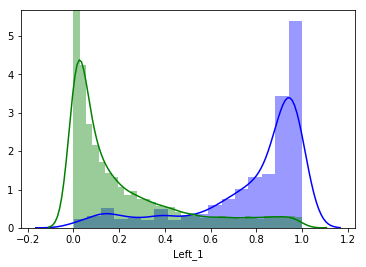

In [666]:
sns.distplot( test_pred[test_pred.actual == 1]["Left_1"], color = 'b' )
sns.distplot( test_pred[test_pred.actual == 0]["Left_1"], color = 'g' )

### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

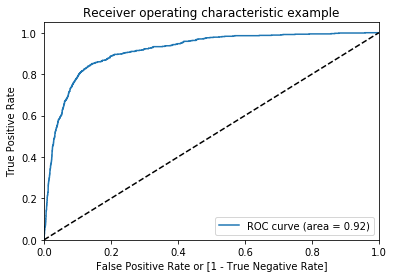

In [667]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( test_pred.actual,
                                     test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Finding Optimal Cutoff Point

In [674]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    test_pred[i]= test_pred.Left_1.map( lambda x: 1 if x > i else 0)
test_pred.head(10)

,index,actual,predicted,Left_0,Left_1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,94436,0,0,0.985155,0.014845,1,0,0,0,0,0,0,0,0,0
1,72272,0,0,0.730094,0.269906,1,1,1,0,0,0,0,0,0,0
2,56618,0,0,0.999870,0.000130,1,0,0,0,0,0,0,0,0,0
3,56539,0,0,0.701031,0.298969,1,1,1,0,0,0,0,0,0,0
4,19506,0,1,0.041495,0.958505,1,1,1,1,1,1,1,1,1,1
5,435,0,0,0.627113,0.372887,1,1,1,1,0,0,0,0,0,0
6,19107,0,0,0.772303,0.227697,1,1,1,0,0,0,0,0,0,0
7,95352,0,0,0.701814,0.298186,1,1,1,0,0,0,0,0,0,0
8,14392,0,1,0.382083,0.617917,1,1,1,1,1,1,1,0,0,0
9,89881,0,0,0.995161,0.004839,1,0,0,0,0,0,0,0,0,0


In [675]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( test_pred.actual, test_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.077676  0.000000  1.000000
0.1   0.1  0.539951  0.503137  0.977077
0.2   0.2  0.677832  0.656371  0.932665
0.3   0.3  0.759404  0.747104  0.905444
0.4   0.4  0.817049  0.812379  0.872493
0.5   0.5  0.856777  0.857505  0.848138
0.6   0.6  0.883152  0.889237  0.810888
0.7   0.7  0.902849  0.916385  0.742120
0.8   0.8  0.919653  0.943653  0.634670
0.9   0.9  0.932784  0.971887  0.468481


C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


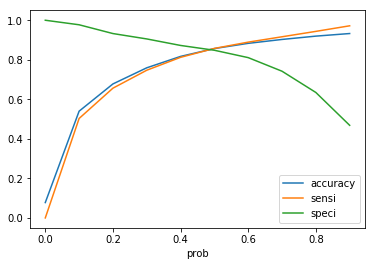

In [676]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [ ]:
## model looks good with 0.5

In [688]:
cm = metrics.confusion_matrix( test_pred.actual, test_pred.predicted )
cm

array([[7107, 1181],
       [ 106,  592]], dtype=int64)

Text(0.5,15,'Predicted label')

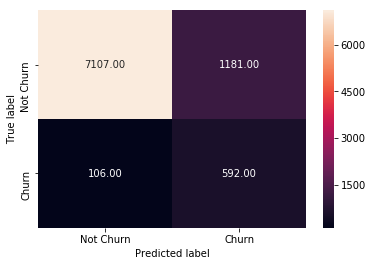

In [689]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Not Churn", "Churn"] , yticklabels = ["Not Churn", "Churn"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Making prediction on full non churn dataset

dataset -- x_test_scaled

In [725]:
len(x_test_scaled)

27520

In [726]:
df_full_test_pca = pc_final.transform(x_test_scaled)
df_full_test_pca.shape

(27520, 45)

In [727]:
# Predicted probabilities
y_pred_full = logsk.predict_proba(df_full_test_pca)

In [728]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred_full)

In [729]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [730]:
# Let's see the head
y_pred_1.count()

1    27520
dtype: int64

In [731]:
df_test_mobile = telecom_data_new['mobile_number' ][telecom_data_new.CHURN_IND == 0]

In [732]:
# Putting CustID to index
df_test_mobile.head()

8     7001524846
21    7002124215
23    7000887461
33    7000149764
38    7000815202
Name: mobile_number, dtype: int64

In [743]:
y_pred_1.head()

,1
0,0.354912
1,0.186010
2,0.128146
3,0.359395
4,0.736631


In [741]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
df_test_mobile.reset_index(drop=True, inplace=True)

In [742]:
df_test_mobile.head()

0    7001524846
1    7002124215
2    7000887461
3    7000149764
4    7000815202
Name: mobile_number, dtype: int64

In [744]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([df_test_mobile,y_pred_1],axis=1)

In [745]:
y_pred_final.head()

,mobile_number,1
0,7001524846,0.354912
1,7002124215,0.186010
2,7000887461,0.128146
3,7000149764,0.359395
4,7000815202,0.736631


In [746]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [747]:
# Let's see the head of y_pred_final
y_pred_final.head()

,mobile_number,Churn_Prob
0,7001524846,0.354912
1,7002124215,0.186010
2,7000887461,0.128146
3,7000149764,0.359395
4,7000815202,0.736631


In [748]:
def churntyp(y_pred_final):
    if ((y_pred_final.Churn_Prob  >= 0.0) & (y_pred_final.Churn_Prob <= 0.3)):
        return 'LOW_CHURN_PROBABILITY'
    elif ((y_pred_final.Churn_Prob  > 0.3) & (y_pred_final.Churn_Prob <= 0.7)):
        return 'MED_CHURN_PROBABILITY'
    else:
        return 'HIGH_CHURN_PROBABILITY'

In [749]:
y_pred_final['CHURN_BAND'] = y_pred_final.apply(churntyp, axis=1)

In [750]:
y_pred_final.to_csv("Fundraising-CHURN-Prediction-Active-With-BAND.csv")

In [752]:
pd.pivot_table(y_pred_final,index=["CHURN_BAND"],values=["mobile_number"],aggfunc='count')

,mobile_number
CHURN_BAND,
HIGH_CHURN_PROBABILITY,2808
LOW_CHURN_PROBABILITY,19179
MED_CHURN_PROBABILITY,5533


    ******************************************************** Thank you ************************************

************************ Decision Tree not serving good accuracy *****

### Building Decision Tree Model

In [631]:
param_grid = {'max_depth': np.arange(3, 30)}

In [632]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
tree.fit( df_train_pca, y_train_res )

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [633]:
tree.best_params_

{'max_depth': 28}

In [634]:
tree.best_score_

0.902740224625624

### Building Final Decision Tree Model

In [635]:
clf_tree = DecisionTreeClassifier( max_depth = 28 )
clf_tree.fit( df_train_pca, y_train_res )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=28,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [636]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( df_test_pca ) } )

In [637]:
tree_test_pred.sample( n = 10 )

,actual,predicted
45703,1,1
50128,0,0
74881,0,0
21639,0,0
79571,0,0
84706,0,0
69407,0,0
14278,0,0
12272,0,0
86344,0,0


In [638]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.7136657022034275

Text(0.5,15,'Predicted label')

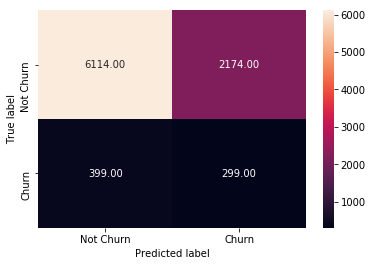

In [639]:
tree_cm = metrics.confusion_matrix( tree_test_pred.actual, tree_test_pred.predicted,
                                 [0,1] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Not Churn", "Churn"] , yticklabels = ["Not Churn", "Churn"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
#USe the selected model to get the band for the test data